In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set_context('poster')

In [5]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [6]:
df = pd.read_pickle('CCPA.pkl.gz')

In [7]:
dfc = df.loc[(df.experiment.isin(['e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

Text(0.5,0.98,'Progress per PRO (FL)')

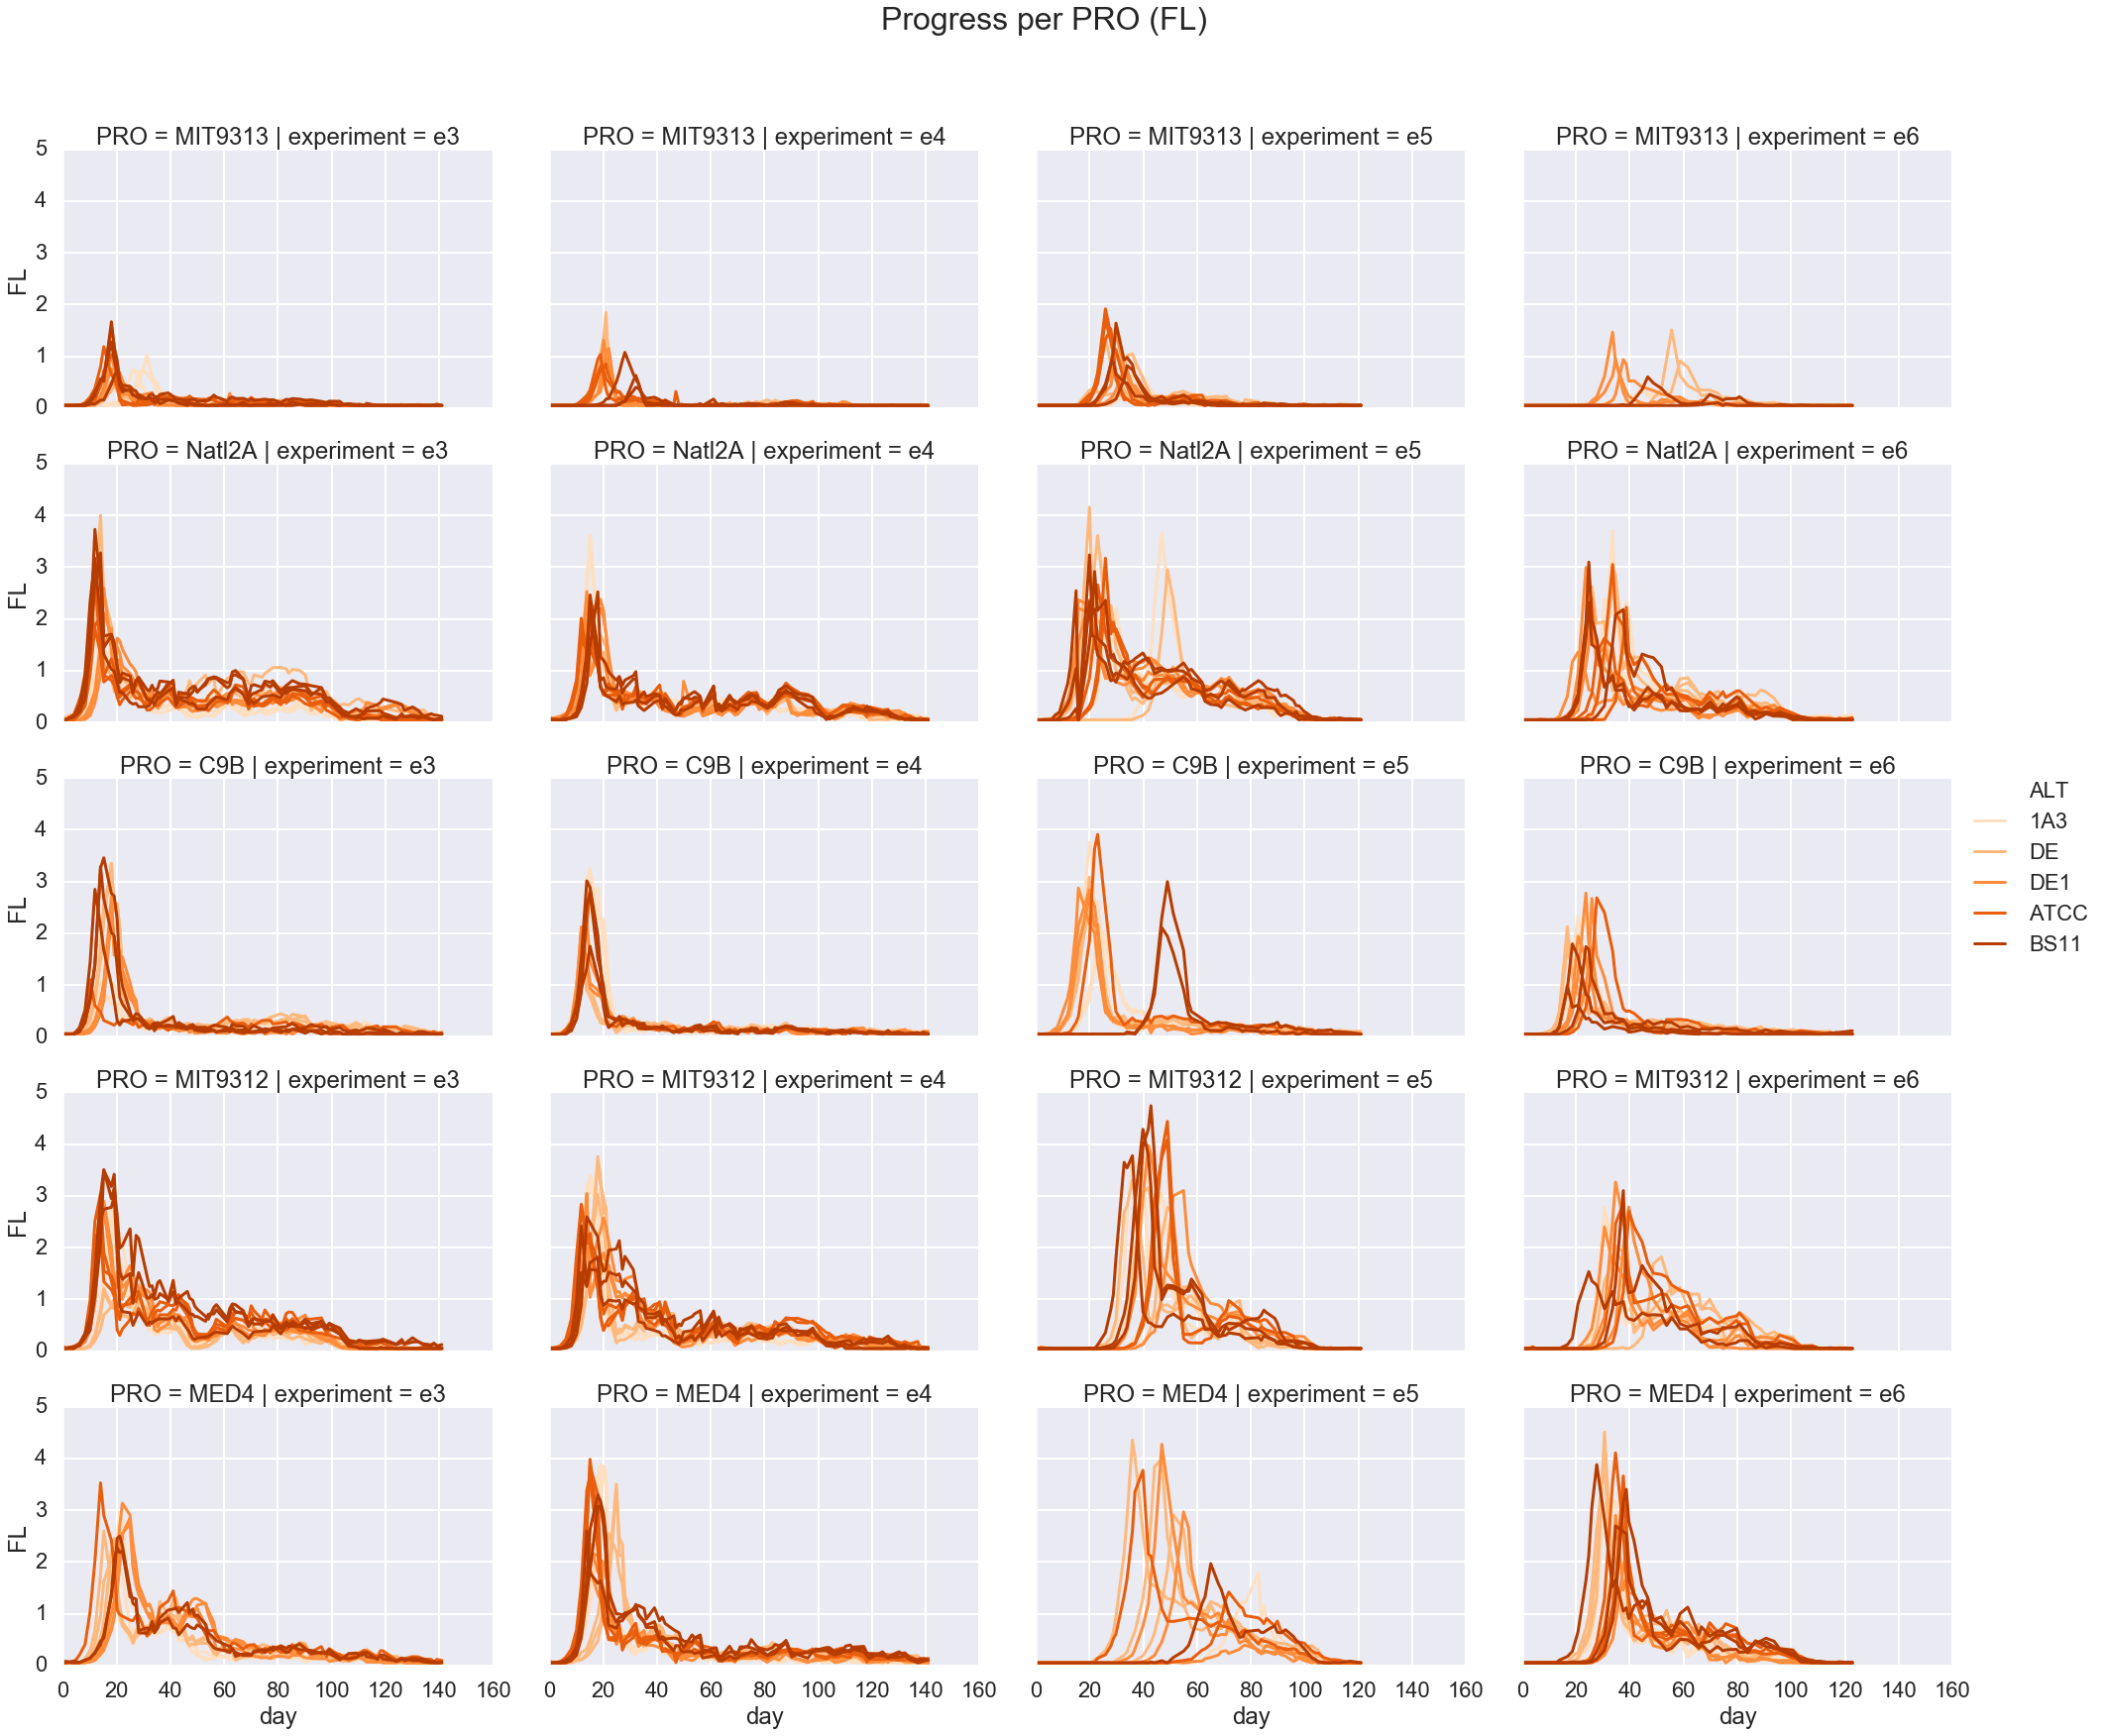

In [8]:
sns.relplot(data=dfc, x='day', y='FL', kind='line', #ci='sd',
#            col='PRO', hue='ALT', row='experiment', 
                           estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,

            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (FL)", fontsize=32)


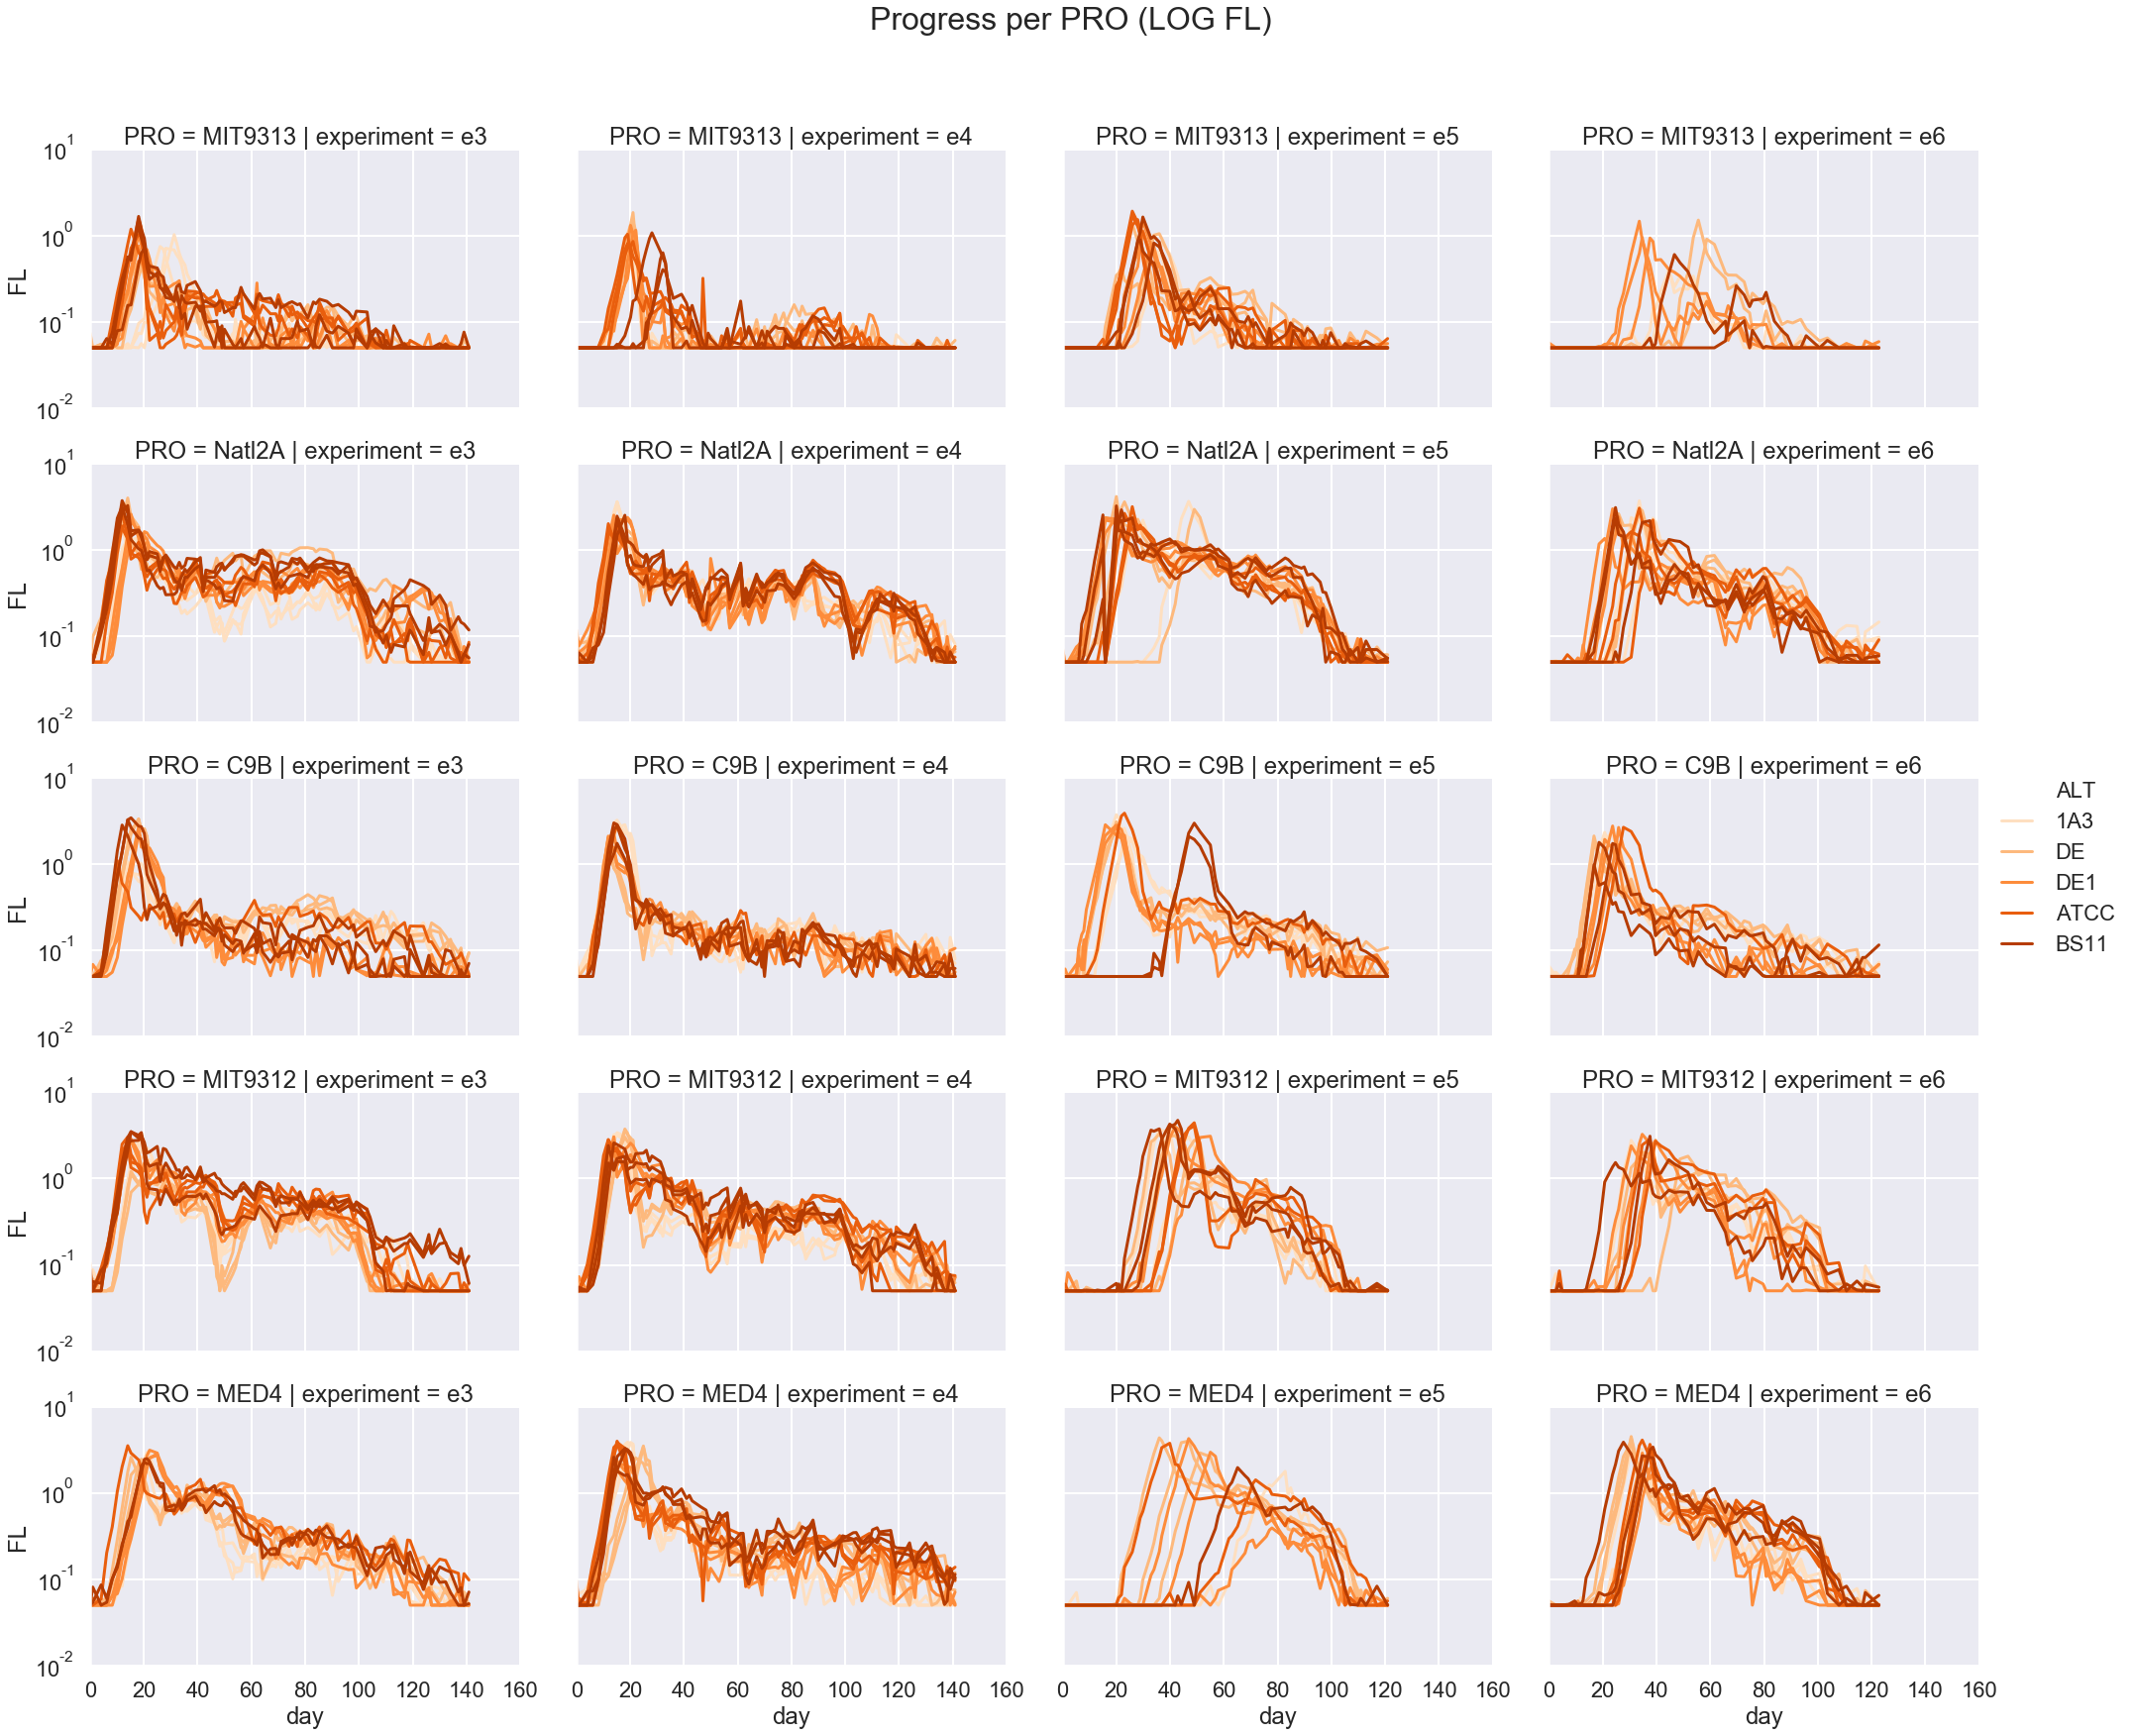

In [58]:
g= sns.relplot(data=dfc, x='day', y='FL', kind='line', 
               #ci='sd',
               estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,
            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
g.fig.get_axes()[0].set_yscale('log')

plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (LOG FL)", fontsize=32)
plt.show()


Text(0.5,0.98,'Progress per PRO (cummulative sum of log FL)')

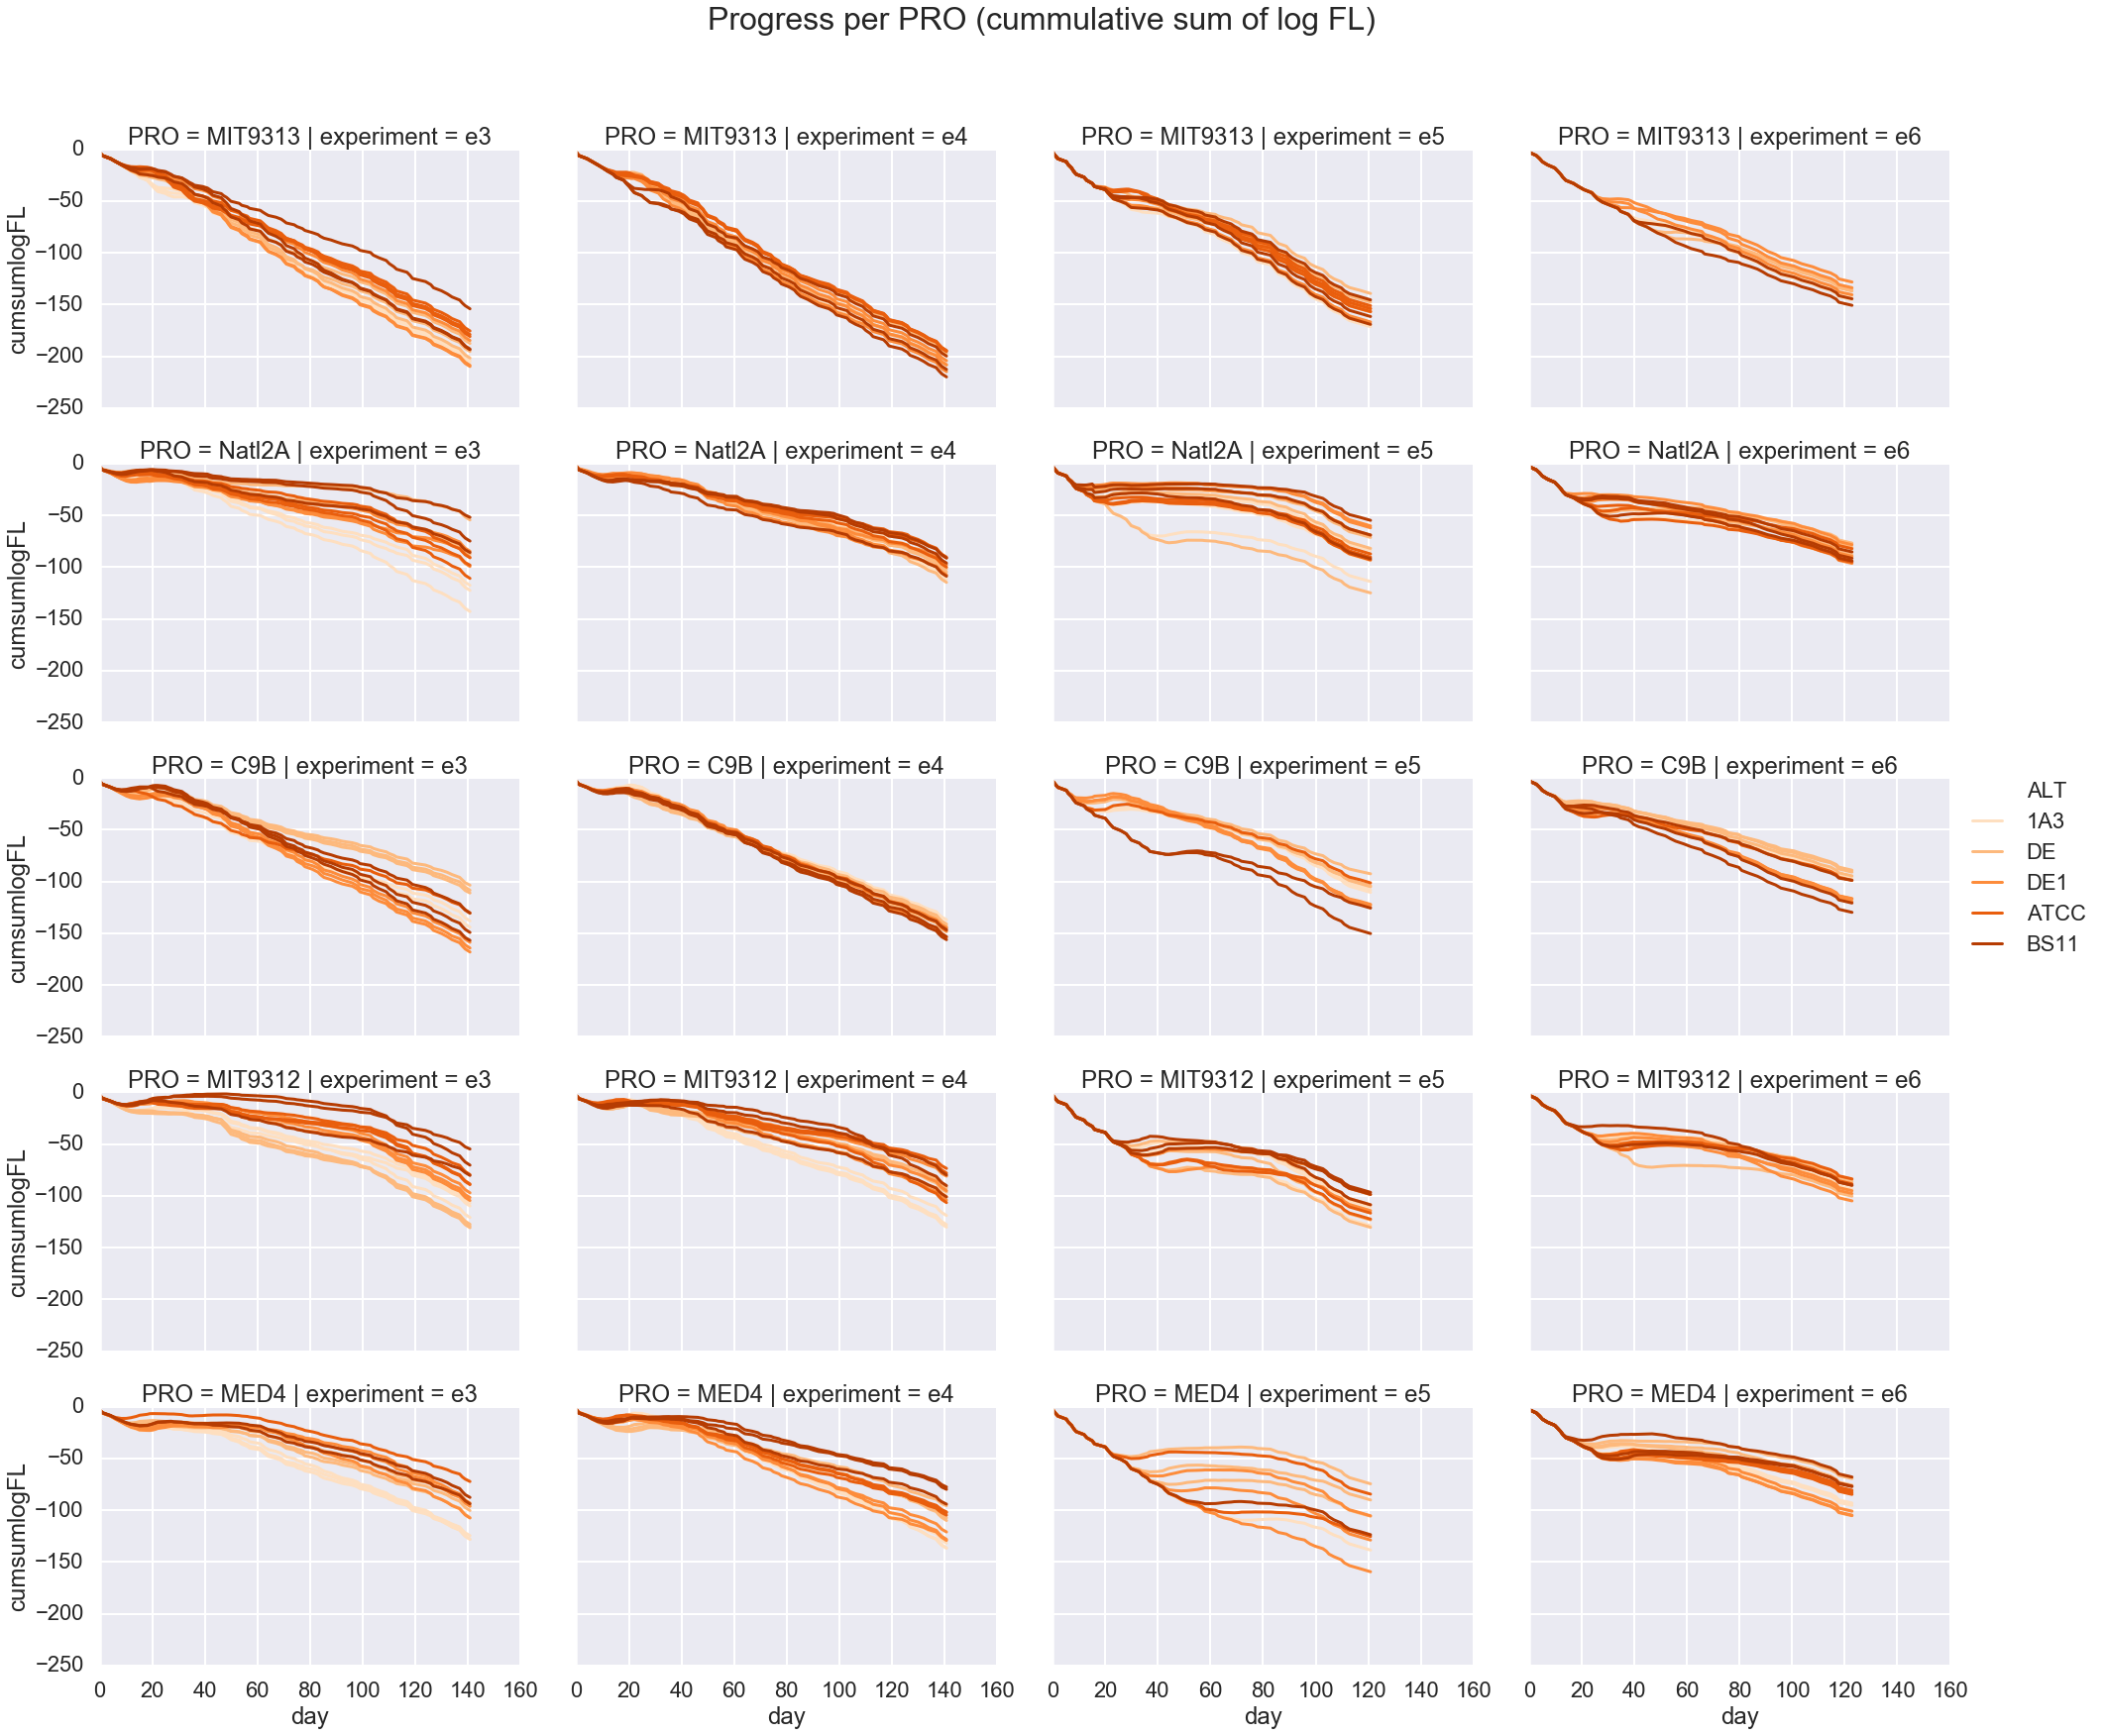

In [61]:
sns.relplot(data=dfc, x='day', y='cumsumlogFL', kind='line', #ci='sd',
            #col='PRO', hue='ALT', row='experiment', 
               estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,
            
            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (cummulative sum of log FL)", fontsize=32)


Text(0.5,0.98,'Progress per PRO (change rate of FL)')

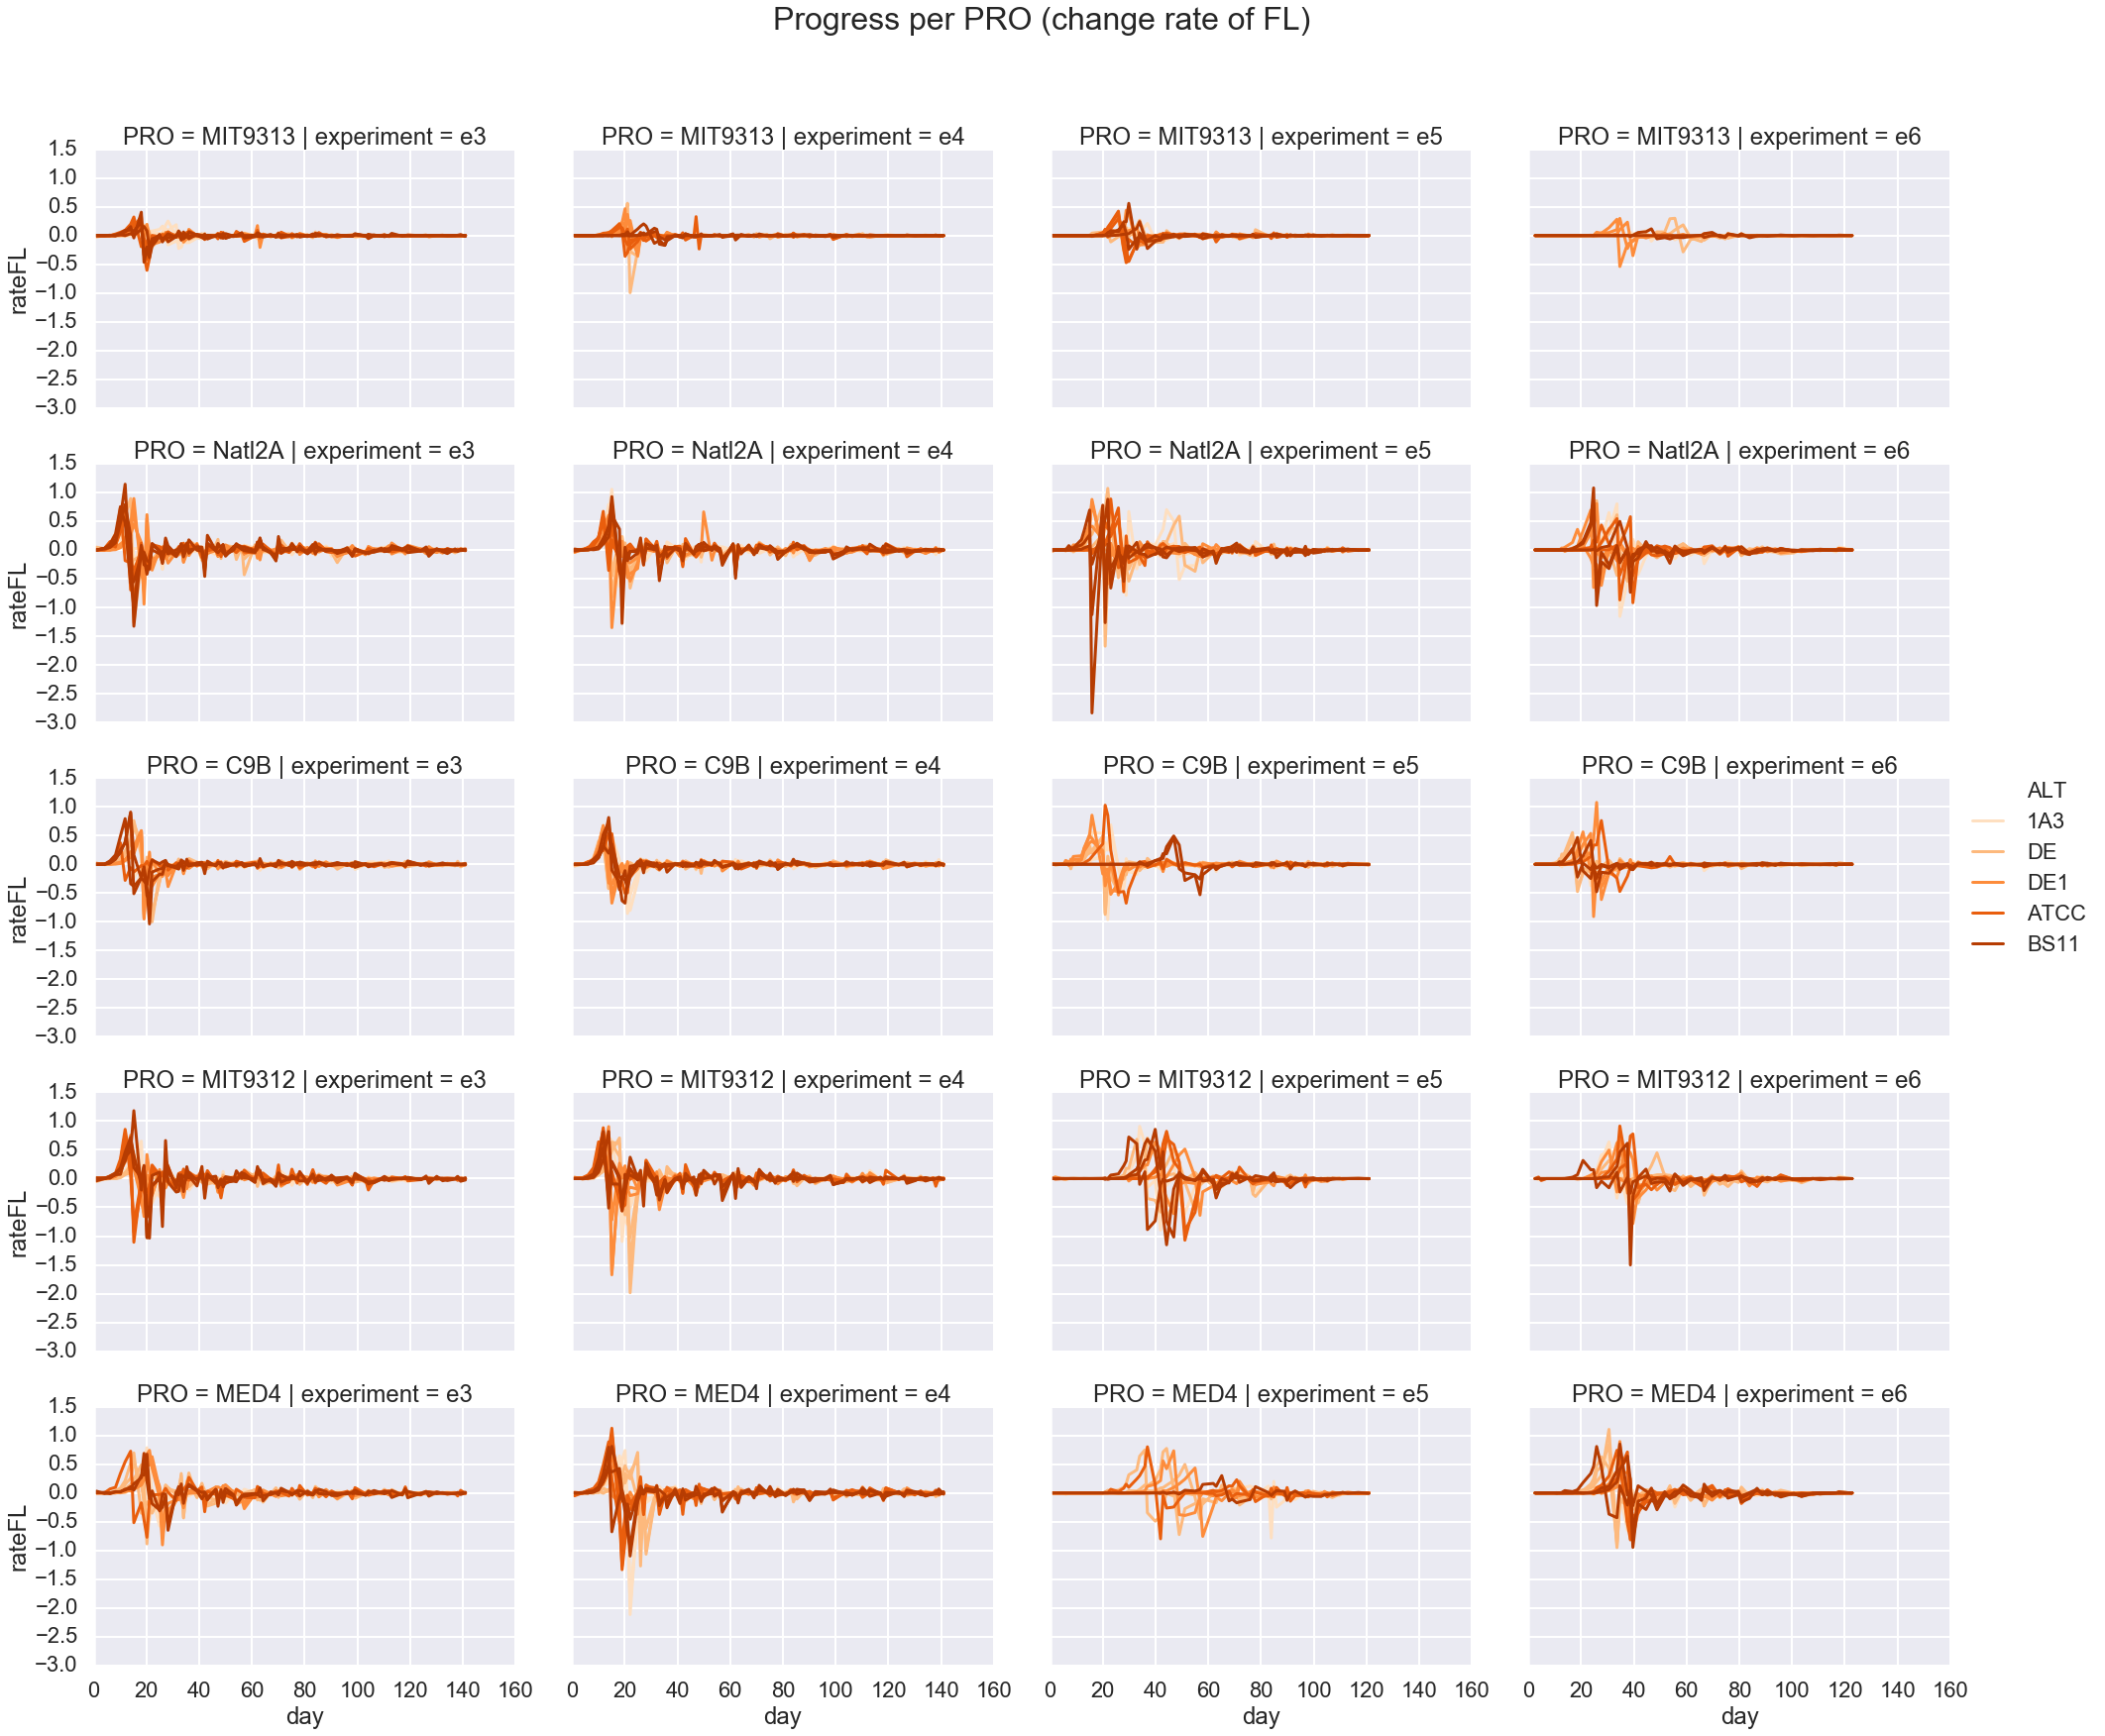

In [62]:
g=sns.relplot(data=dfc, x='day', y='rateFL', kind='line', #ci='sd',
               estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,
              
#            col='PRO', hue='ALT', row='experiment', 
            palette=apallete, hue_order=aorder,
            aspect=1.4
           )

#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per PRO (change rate of FL)", fontsize=32)


Text(0.5,0.98,'Progress per ALT (log FL)')

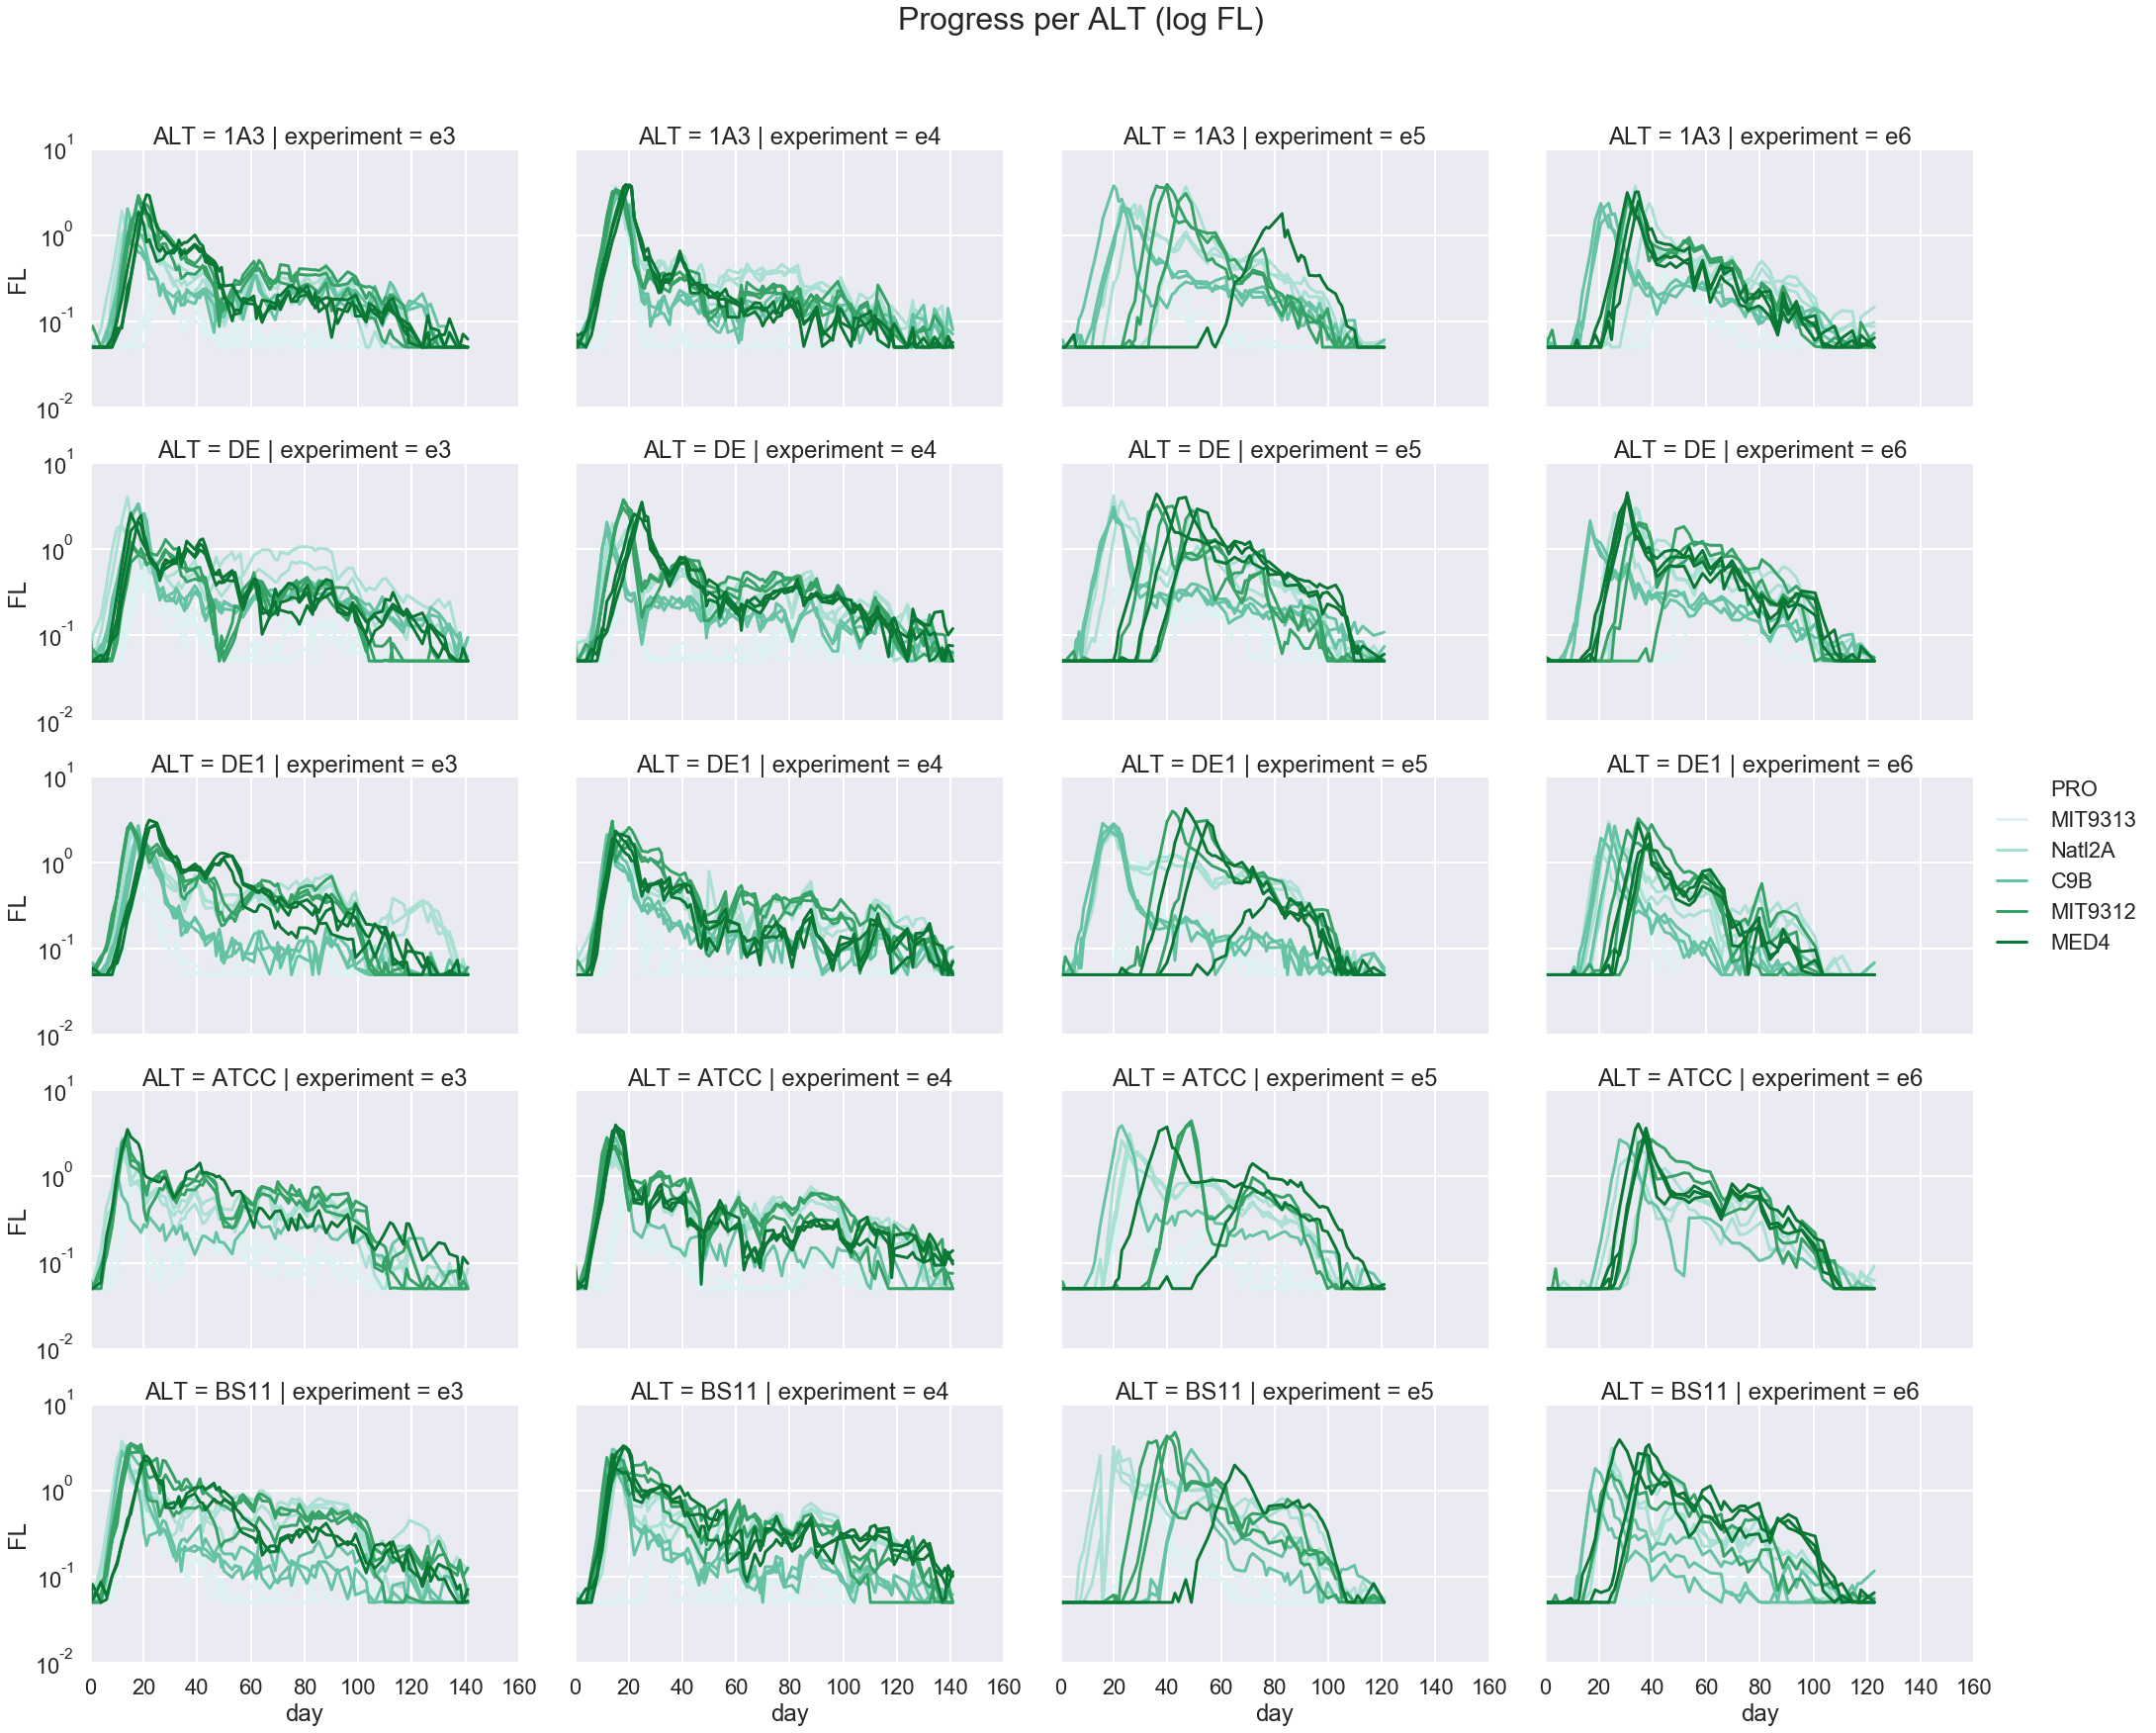

In [63]:
g= sns.relplot(data=dfc, x='day', y='FL', kind='line', #ci='sd',
               estimator=None, units='experiment_sample',
            row='ALT', hue='PRO', col='experiment', row_order=aorder,
            #hue='PRO', col='ALT', row='experiment',
            palette=ppallete, hue_order=porder,
           aspect=1.4)
g.fig.get_axes()[0].set_yscale('log')

plt.subplots_adjust(top=0.9)
plt.suptitle("Progress per ALT (log FL)", fontsize=32)


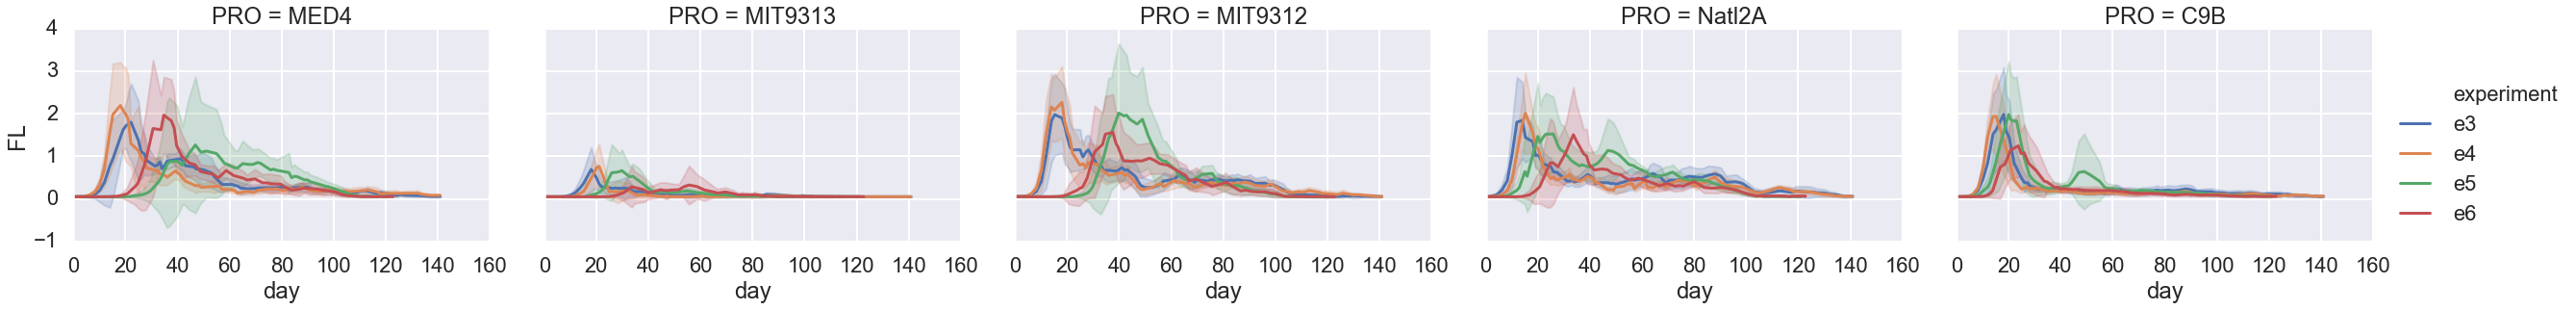

In [20]:
g =sns.relplot(data=dfc, x='day', y='FL', kind='line', ci='sd',
            col='PRO', aspect=1.4, #style='ALT',  #col='culture', #col='ALT', 
            
            hue='experiment') #, col_wrap=3)
#g.fig.get_axes()[0].set_yscale('log')

#plt.subplots_adjust(top=0.9)
#plt.suptitle("Progress per Experiment", fontsize=32)


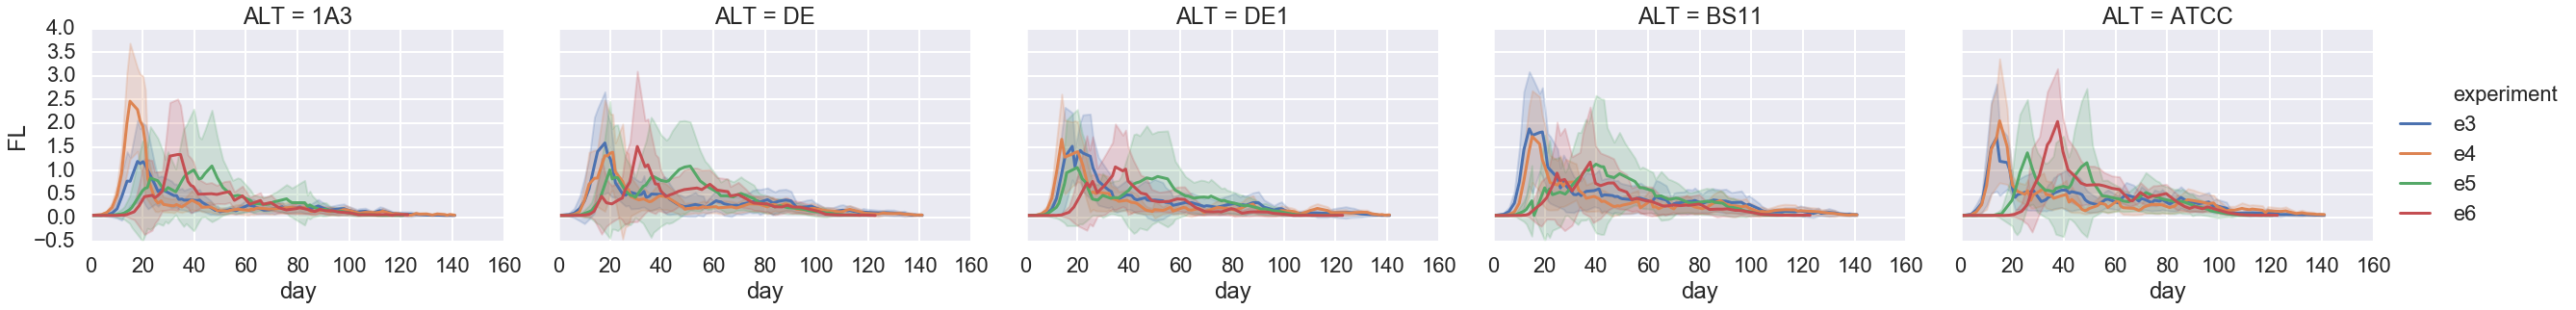

In [21]:
g= sns.relplot(data=dfc, x='day', y='FL', kind='line', ci='sd',
            col='ALT', aspect=1.4, #style='ALT',  #col='culture', #col='ALT', 
            
            hue='experiment') #, col_wrap=3)
#g.fig.get_axes()[0].set_yscale('log')

#plt.subplots_adjust(top=0.9)
#plt.suptitle("Progress per Experiment", fontsize=32)


# Features from Curves

In [9]:
g = cp.generate_features(dfc)

In [10]:
g.columns

Index(['max', 'max_log', 'max_day', 'min', 'min_log', 'experiment', 'sample',
       'PRO', 'ALT', 'culture', 'growth_half_day', 'growth_half_val',
       'growth_log_half_day', 'growth_log_half_val', 'growth_tenth_day',
       'growth_tenth_val', 'growth_log_tenth_day', 'growth_log_tenth_val',
       'growth_log_intercept', 'growth_log_coefficient', 'growth_log_score_r2',
       'growth_auc', 'growth_logauc', 'growth_diff', 'growth_diff_log',
       'growth_mean', 'growth_std', 'growth_min', 'growth_max',
       'growth_mean_log', 'growth_std_log', 'growth_min_log', 'growth_max_log',
       'growth_mean_rate', 'growth_std_rate', 'growth_min_rate',
       'growth_max_rate', 'growth_mean_log_rate', 'growth_std_log_rate',
       'growth_min_log_rate', 'growth_max_log_rate', 'decay_half_day',
       'decay_half_val', 'decay_log_half_day', 'decay_log_half_val',
       'decay_tenth_day', 'decay_tenth_val', 'decay_log_tenth_day',
       'decay_log_tenth_val', 'decay_log_intercept', 'decay_lo

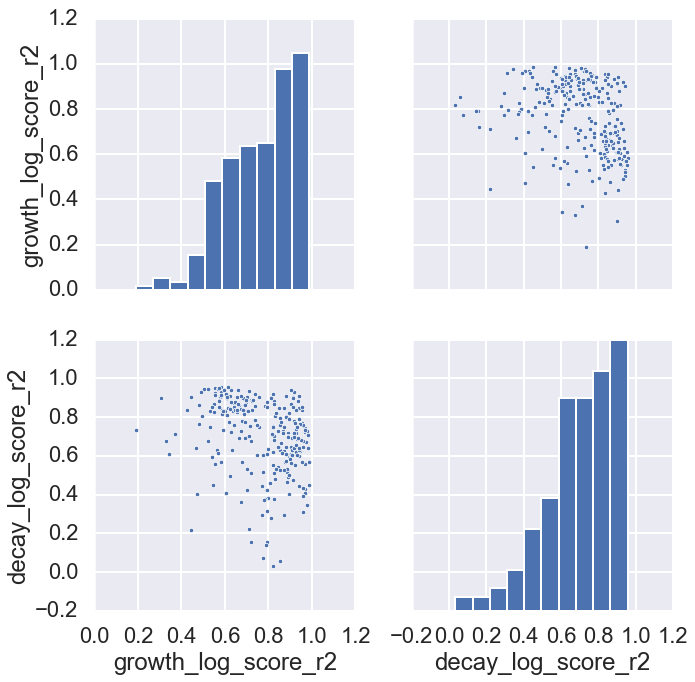

In [11]:
#sns.pairplot(data=g.loc[[]], x='growth_log_score_r2' ,y='decay_log_score_r2')
sns.pairplot(data=g.loc[g.max_day > -1,['growth_log_score_r2' ,'decay_log_score_r2']], height=5)

In [12]:
X = cp.features2X(g)
metadf = cp.get_meta(g, meta_col=['experiment_sample', 'experiment','sample', 'PRO', 'ALT', 'culture'], 
                     value_col='max')
dfpca = cp.run_pca(X=X, metadf=metadf, sample_col='experiment_sample')

Variance percent explained
 [0.3873703  0.20153907]


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


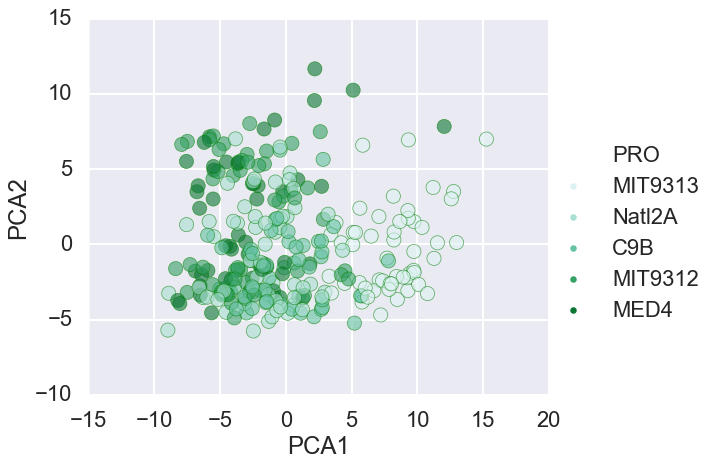

In [13]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

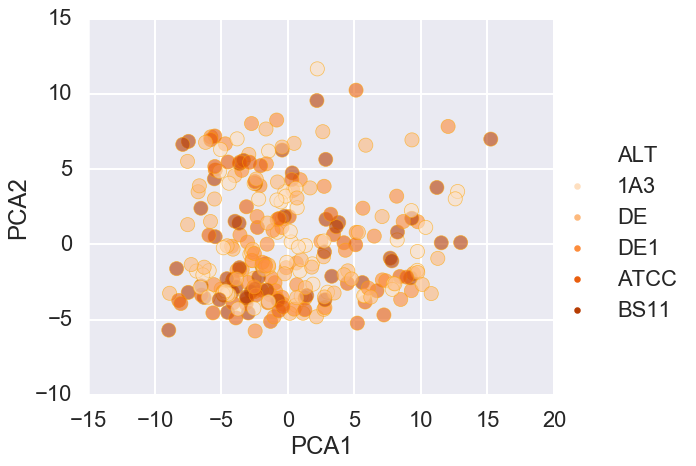

In [14]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2, 
                       palette=apallete, hue_order=aorder, edgecolor=aedge,
)

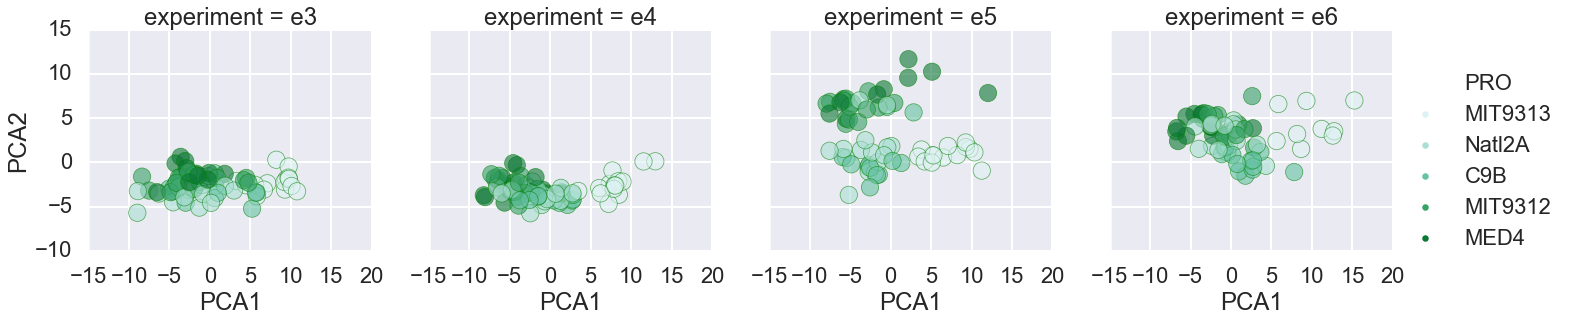

In [15]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', s=300, alpha=0.6,
            col='experiment', height=5,
                       palette=ppallete, hue_order=porder, edgecolor=pedge,
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

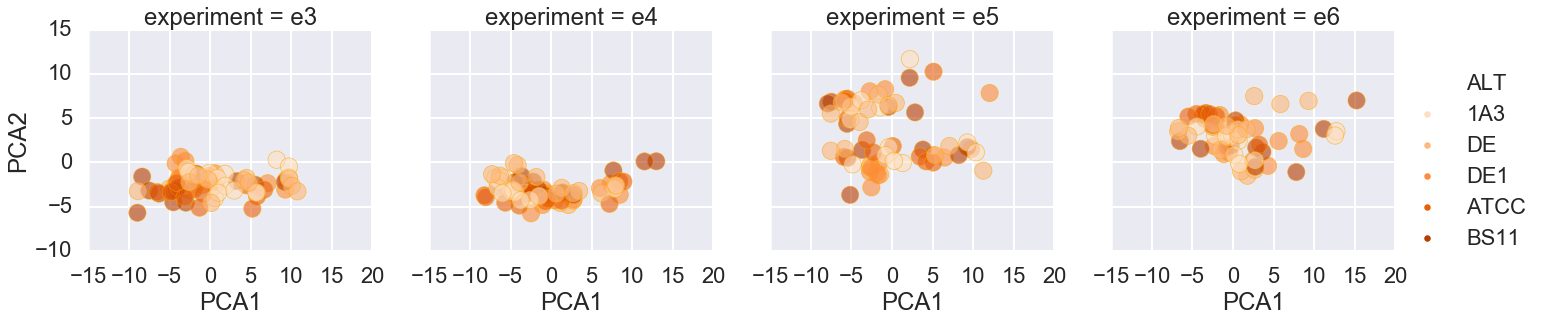

In [16]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT', s=300, alpha=0.6,
            col='experiment', height=5,
                                   palette=apallete, hue_order=aorder, edgecolor=aedge,

           )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
X = cp.features2X(g)
y = g['PRO']
metadf = cp.get_meta(g, meta_col=['experiment_sample', 'experiment','sample', 'PRO', 'ALT', 'culture'], 
                     value_col='max')
clf = cp.forest_classifier(X=X, y=y)

0.6555555555555556


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


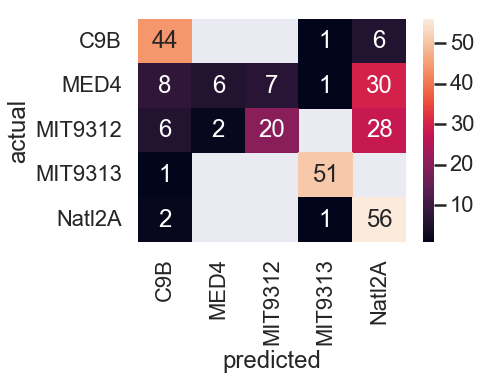

In [18]:
cp.forest_heatmap(clf=clf, X=X, y=y)

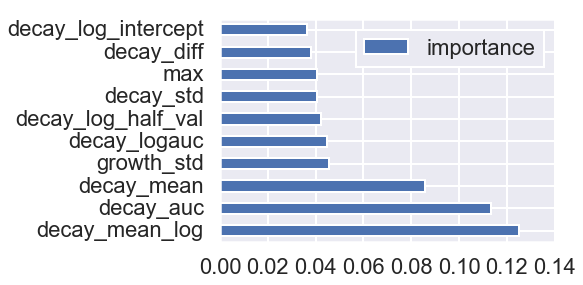

In [20]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)

In [21]:
X = cp.features2X(g)
y = g['ALT']
clf = cp.forest_classifier(X=X, y=y)

0.5518518518518518


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


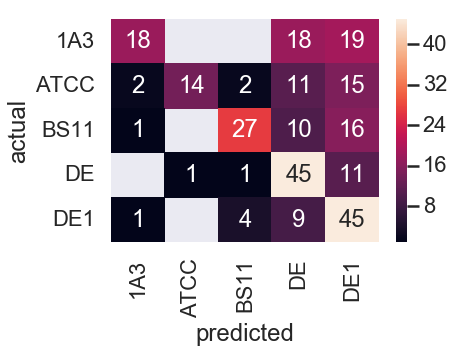

In [22]:
cp.forest_heatmap(clf=clf, X=X, y=y)

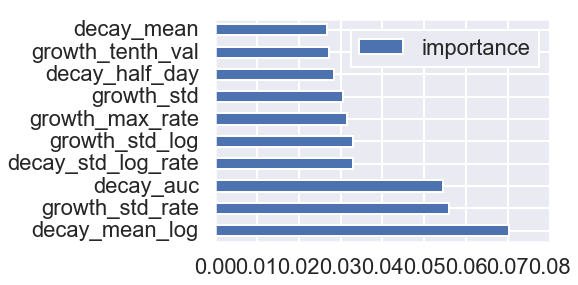

In [23]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)

# Comparison of all Experiments

In [24]:
X = cp.experiments2X(dfc, sample_col='experiment_sample')
metadf = cp.get_meta(dfc)
dfpca = cp.run_pca(X=X, metadf=metadf)

Variance percent explained
 [0.78149607 0.13370993]


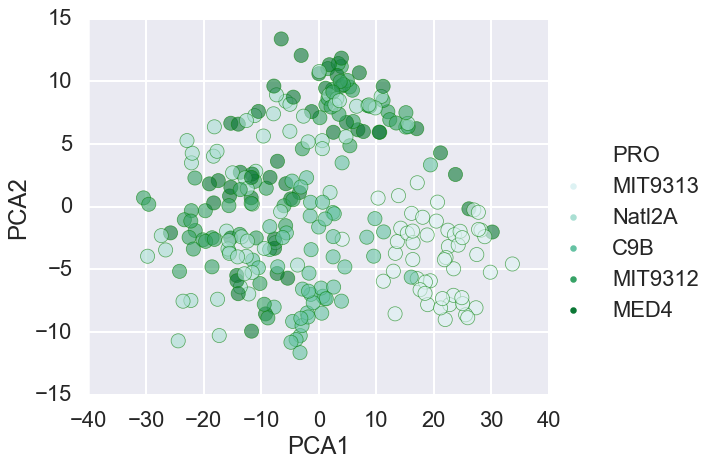

In [25]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            palette=ppallete, hue_order=porder,edgecolor=pedge,
           )


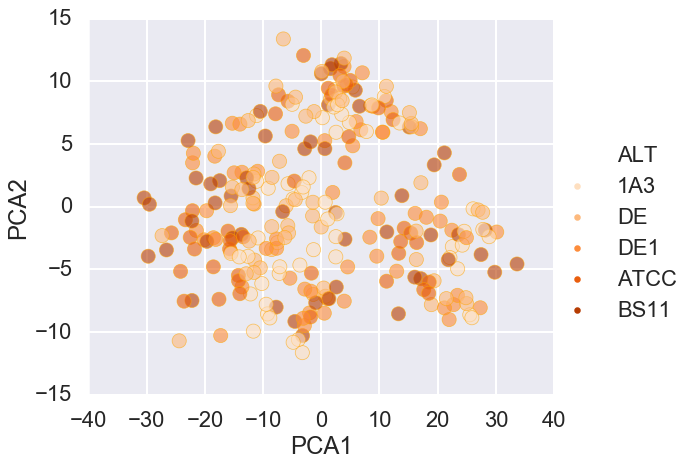

In [26]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2, 
                       palette=apallete, hue_order=aorder, edgecolor=aedge,
)

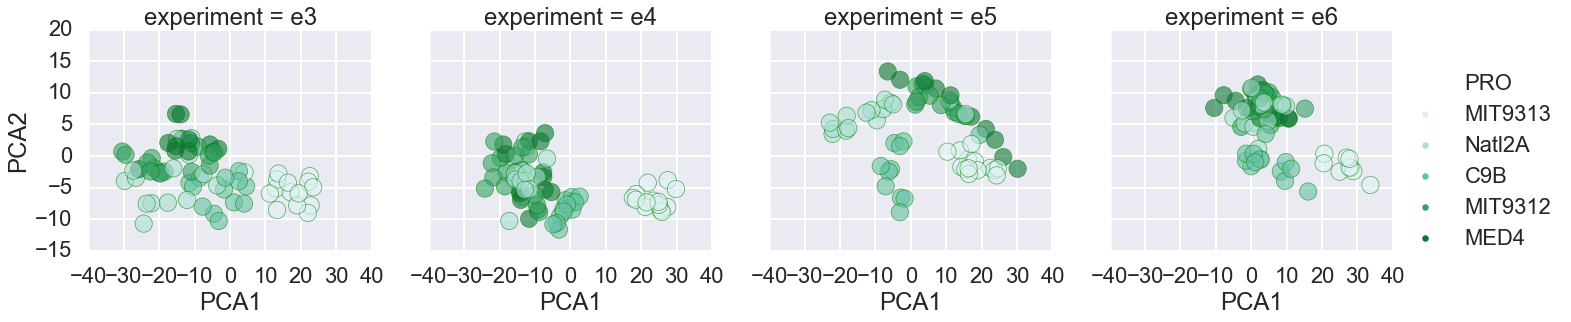

In [27]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', s=300, alpha=0.6,
            col='experiment', height=5,
                       palette=ppallete, hue_order=porder, edgecolor=pedge,
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

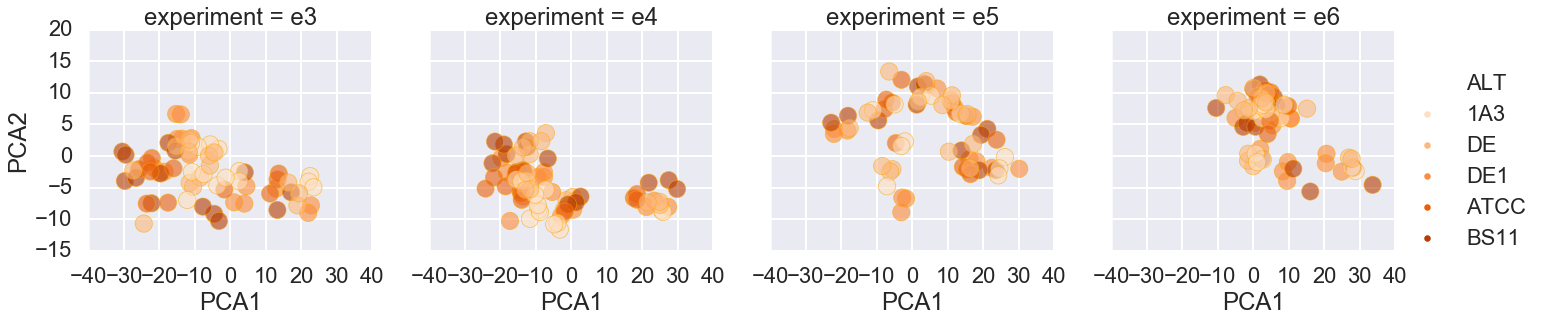

In [28]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT', s=300, alpha=0.6,
            col='experiment', height=5,
                                   palette=apallete, hue_order=aorder, edgecolor=aedge,

           )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [117]:
X1 = cp.experiments2X(dfc, cumsummode=False)
X1.columns = 'logFL_' + X1.columns.astype(str)
X3 = cp.experiments2X(dfc)
X3.columns = 'cumsumlogFL_' + X3.columns.astype(str)
X2 = cp.experiments2X(dfc, cumsummode=False, value_col='rateFL')
X2.columns = 'rate_' + X2.columns.astype(str)
X = pd.concat([X1, X2, X3], axis=1).fillna(0)
#X1.isna().sum().sum(), X2.isna().sum().sum(), X.isna().sum().sum()
metadf = cp.get_meta(dfc)
dfpca = cp.run_pca(X=X, metadf=metadf)

Variance percent explained
 [0.39490732 0.1441725 ]


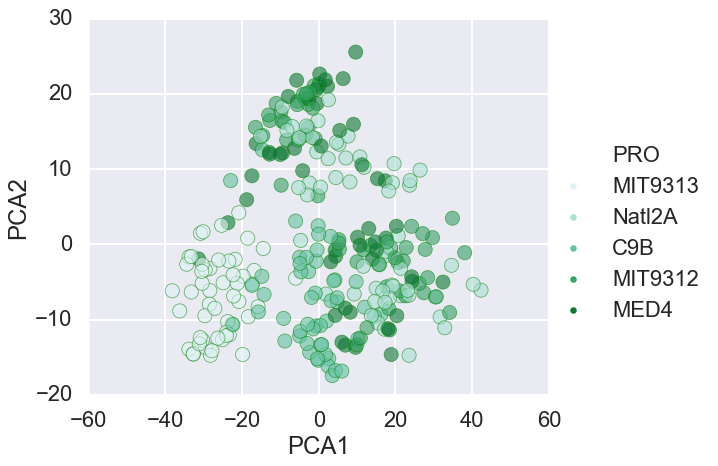

In [118]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            palette=ppallete, hue_order=porder,edgecolor=pedge,
           )


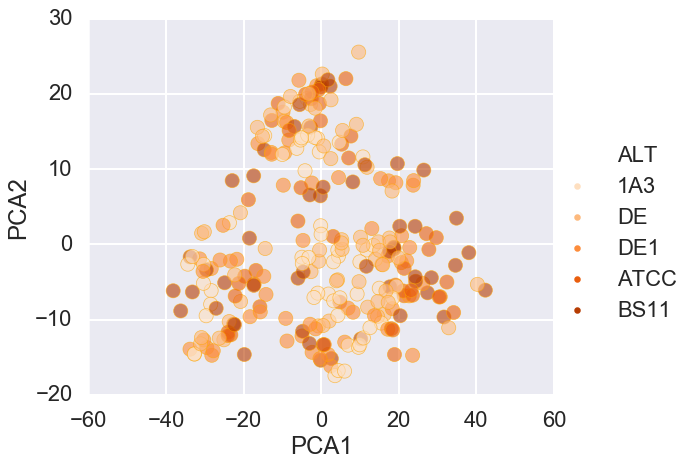

In [119]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2, 
                       palette=apallete, hue_order=aorder, edgecolor=aedge,
)

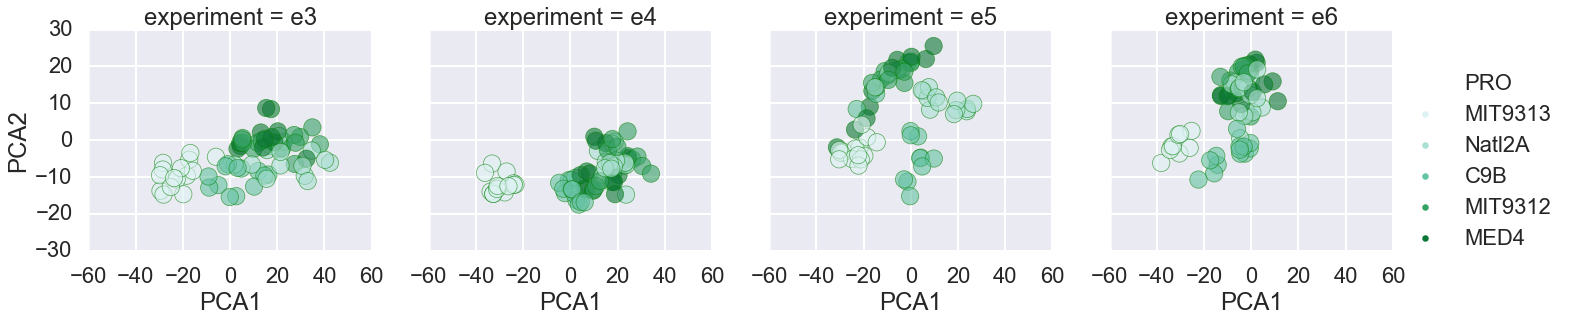

In [120]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', s=300, alpha=0.6,
            col='experiment', height=5,
                       palette=ppallete, hue_order=porder, edgecolor=pedge,
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

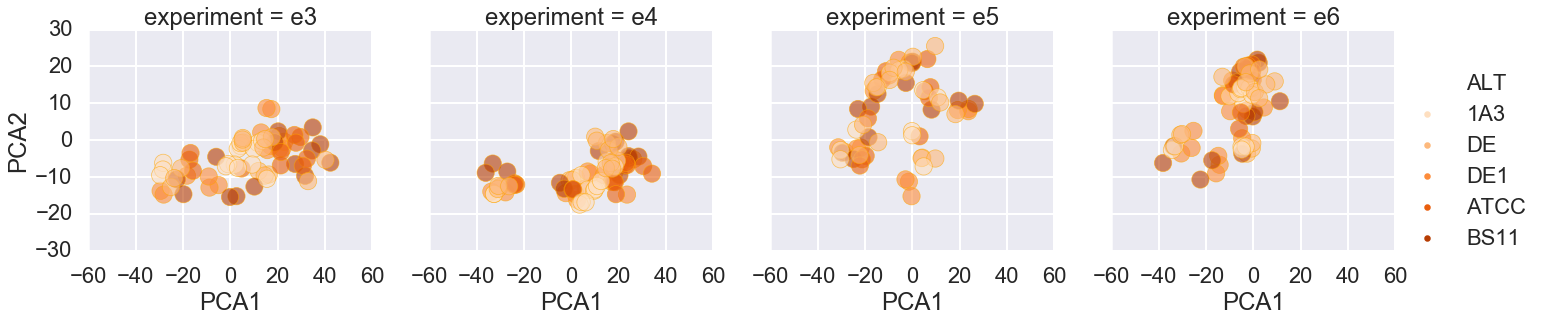

In [121]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT', s=300, alpha=0.6,
            col='experiment', height=5,
                                   palette=apallete, hue_order=aorder, edgecolor=aedge,

           )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [69]:
X = cp.experiments2X(dfc, cumsummode=False)
#X1.columns = 'logFL_' + X1.columns.astype(str)
#X = X1
#X = cp.experiments2X(df)
metadf = cp.get_meta(dfc)
y = metadf['PRO']
clf = cp.forest_classifier(X=X, y=y)

0.6925925925925925


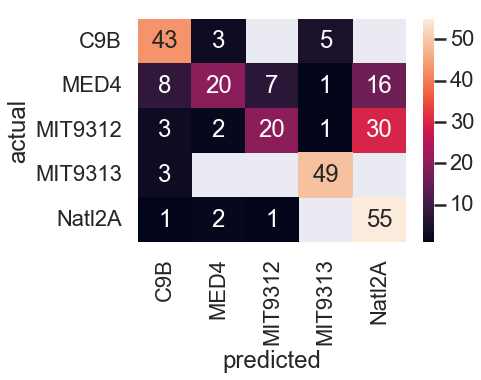

In [70]:
cp.forest_heatmap(clf=clf, X=X, y=y)

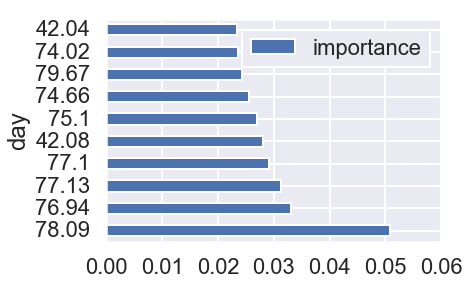

In [71]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)

In [35]:
X1 = cp.experiments2X(dfc, cumsummode=False)
X1.columns = 'logFL_' + X1.columns.astype(str)
X3 = cp.experiments2X(dfc)
X3.columns = 'cumsumlogFL_' + X3.columns.astype(str)
X2 = cp.experiments2X(dfc, cumsummode=False, value_col='rateFL')
X2.columns = 'rate_' + X2.columns.astype(str)
X = pd.concat([X1, X2, X3], axis=1).fillna(0)
#X = cp.experiments2X(df)
metadf = cp.get_meta(dfc)
y = metadf['PRO']
clf = cp.forest_classifier(X=X, y=y)

0.6185185185185185


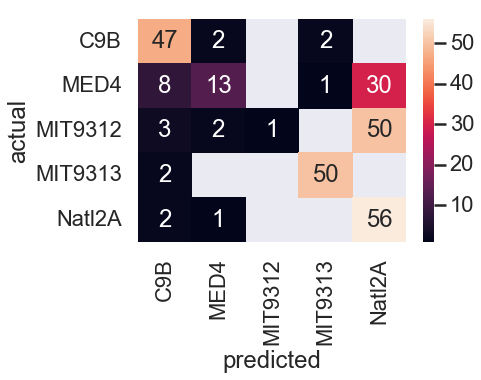

In [36]:
cp.forest_heatmap(clf=clf, X=X, y=y)

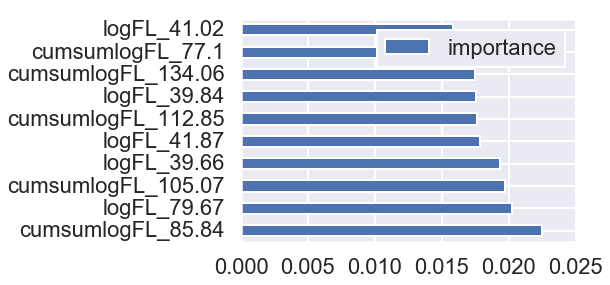

In [37]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)

# Decay Curve

In [42]:
dfd = cp.generate_decay(dfc, sample_col='experiment_sample')
dfd = cp.update_calculated_fields(dfd, group_col='experiment_sample')


In [87]:
max_day = dfd.groupby('experiment_sample')['day'].max()
keep = max_day.loc[max_day > 78].index

dfd = dfd.loc[(dfd.experiment_sample.isin(keep)) & (dfd.day < 80)]

In [88]:
dfd.head()

experiment_sample   day        FL experiment sample  PRO ALT     culture  \
0           e3, 10A  0.00  1.000000         e3    10A  C9B  DE  Co_Culture   
1           e3, 10A  1.03  0.727625         e3    10A  C9B  DE  Co_Culture   
2           e3, 10A  2.14  0.768496         e3    10A  C9B  DE  Co_Culture   
3           e3, 10A  3.10  0.630668         e3    10A  C9B  DE  Co_Culture   
4           e3, 10A  4.09  0.369332         e3    10A  C9B  DE  Co_Culture   

    FL_orig     logFL  cumsumFL  cumsumlogFL  zscoreFL    diffFL  difflogFL  \
0  1.000000  0.000000  1.000000     0.000000  5.143301       NaN        NaN   
1  0.727625 -0.317969  1.727625    -0.317969  3.548186 -0.272375  -0.317969   
2  0.768496 -0.263319  2.496122    -0.581288  3.787540  0.040871   0.054650   
3  0.630668 -0.460975  3.126790    -1.042264  2.980373 -0.137828  -0.197656   
4  0.369332 -0.996060  3.496122    -2.038324  1.449901 -0.261337  -0.535085   

   diffday    rateFL  ratelogFL  
0      NaN       NaN        NaN  
1     1.03 -0.264441  -0.308708  
2     1.11  0.036821   0.049234  
3     0.96 -0.143571  -0.205892  
4     0.99 -0.263976  -0.540490

Text(0.5,0.98,'Relative Decline Curve ')

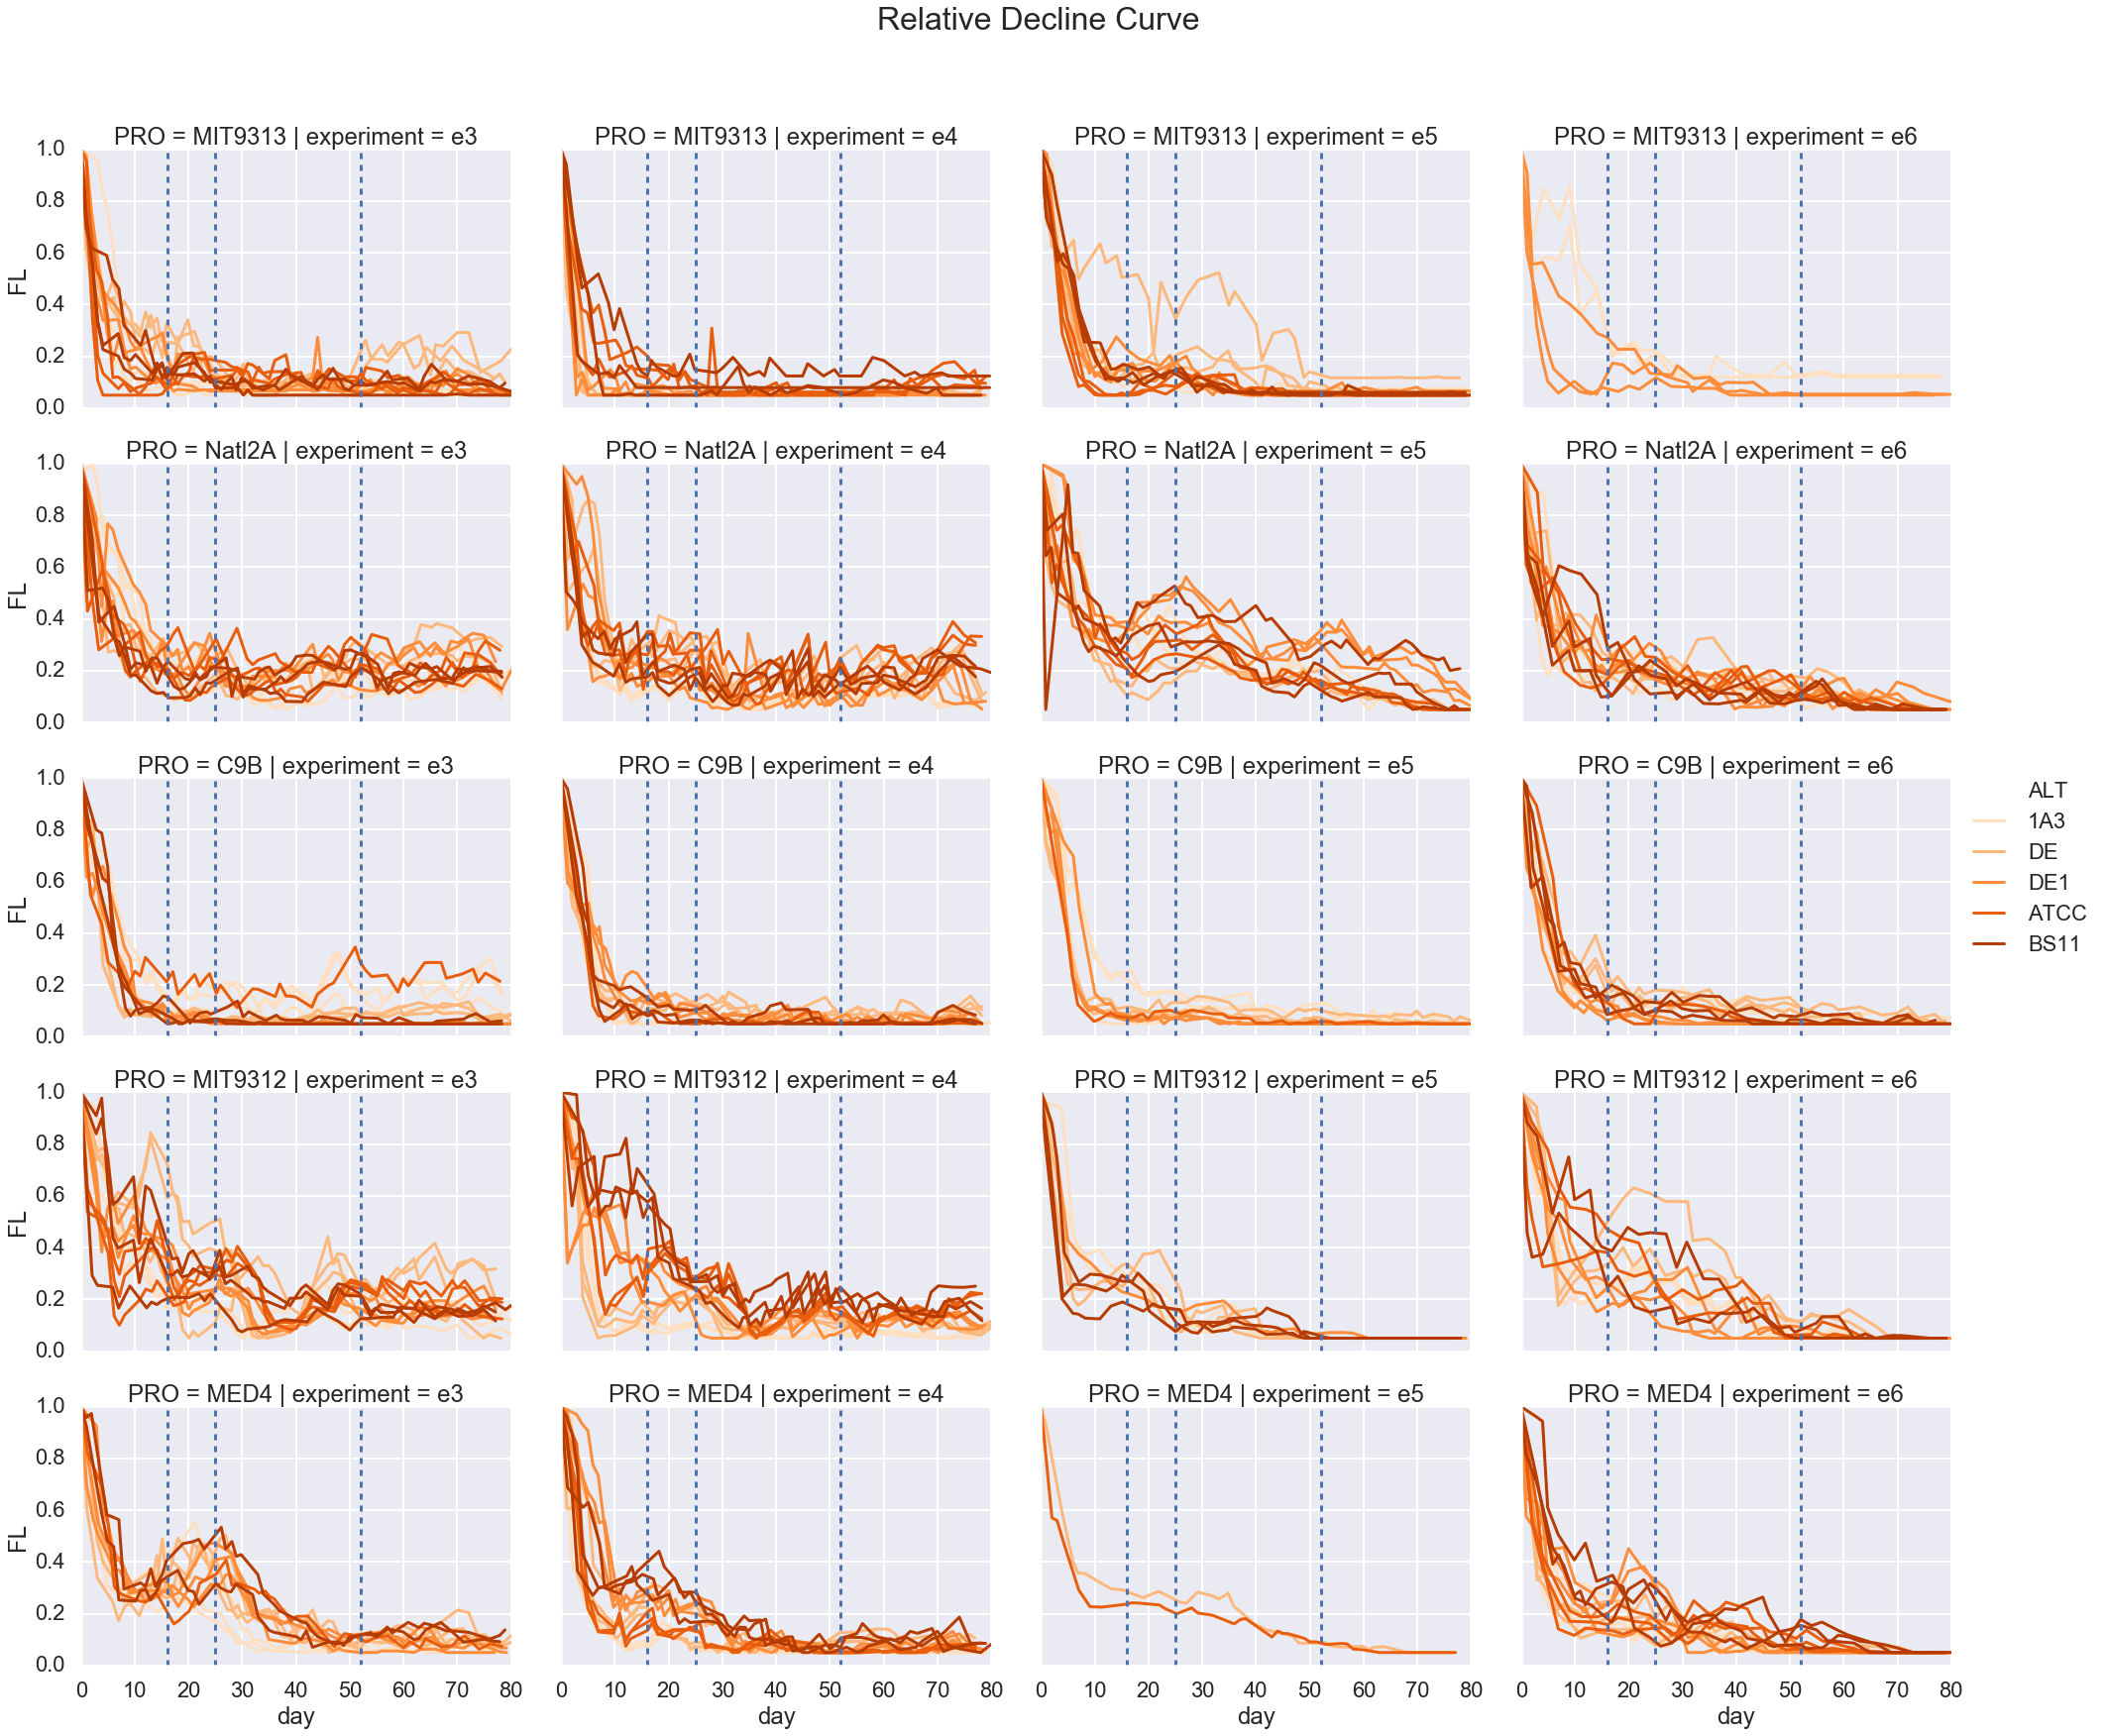

In [113]:
a = sns.relplot(data=dfd, x='day', y='FL', kind='line', #ci='sd',
#            col='PRO', hue='ALT', row='experiment', 
                           estimator=None, units='experiment_sample',
            row='PRO', hue='ALT', col='experiment', row_order=porder,

            palette=apallete, hue_order=aorder,
            aspect=1.4
           )
for l in a.axes:
    for ax in l:
        ax.axvline(16, ls='--', label='17')
        ax.axvline(25, ls='--', label='23')
        ax.axvline(52, ls='--', label='50')
    

# g.fig.get_axes()[0].set_yscale('log')
# for x, y in zip(df['a'], df['b']):
#     ax.hlines(y, 0, x, color='blue')
#     ax.vlines(x, 0, y, color='blue')

#plt.title("Progress per PRO")
plt.subplots_adjust(top=0.9)
plt.suptitle("Relative Decline Curve ", fontsize=32)


In [90]:
X = cp.experiments2X(dfd)
metadf = cp.get_meta(df)
dfpca = cp.run_pca(X=X, metadf=metadf)


Variance percent explained
 [0.85286428 0.09375528]


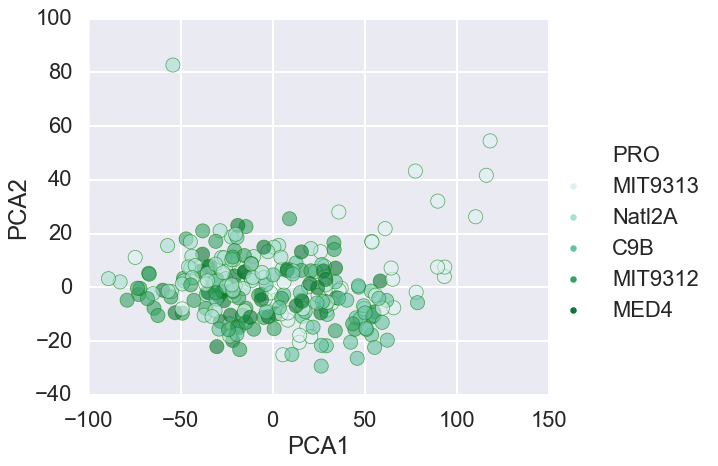

In [91]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            palette=ppallete, hue_order=porder,edgecolor=pedge,
           )


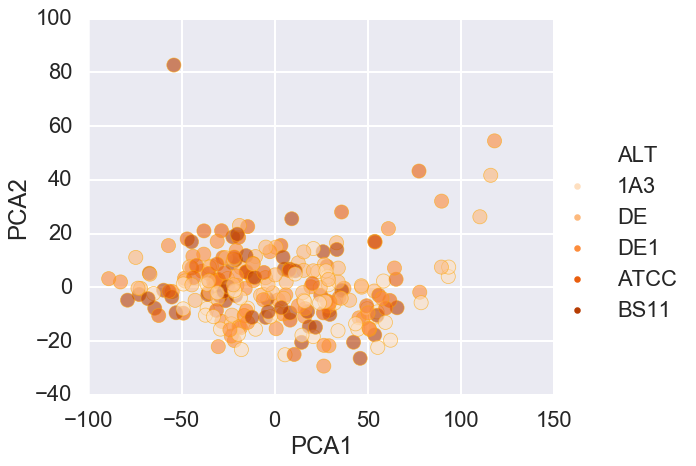

In [92]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2, 
                       palette=apallete, hue_order=aorder, edgecolor=aedge,
)

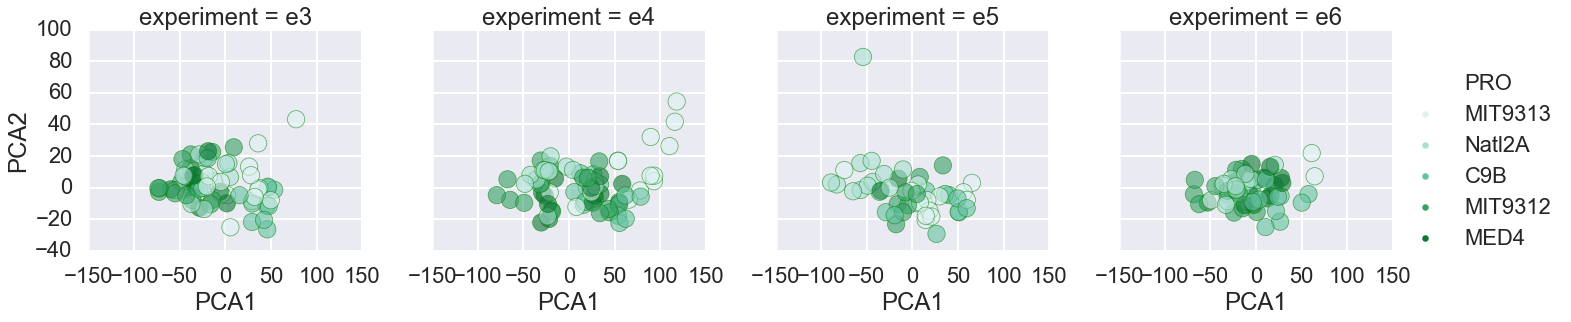

In [93]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', s=300, alpha=0.6,
            col='experiment', height=5,
                       palette=ppallete, hue_order=porder, edgecolor=pedge,
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

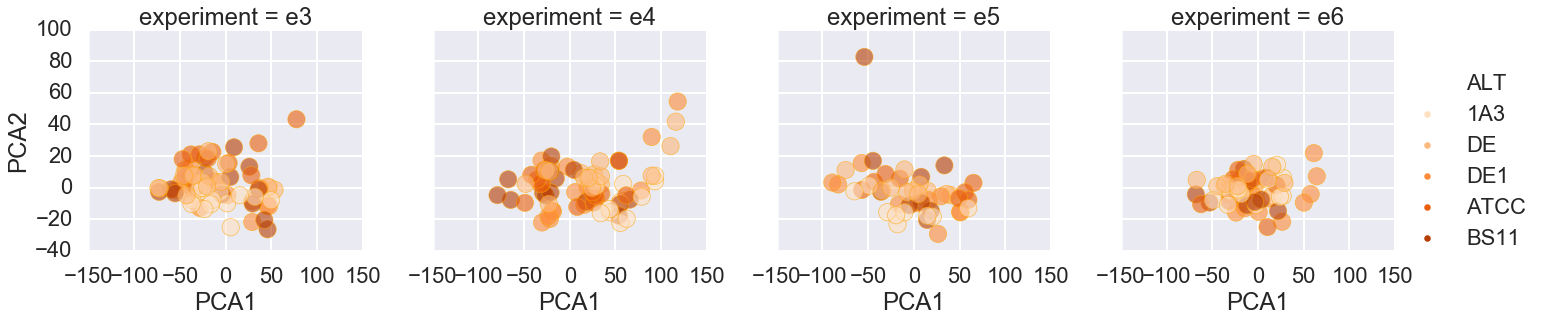

In [94]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT', s=300, alpha=0.6,
            col='experiment', height=5,
                                   palette=apallete, hue_order=aorder, edgecolor=aedge,

           )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
X = cp.experiments2X(dfd, cumsummode=False)
#X1.columns = 'logFL_' + X1.columns.astype(str)
#X = X1
#X = cp.experiments2X(df)
metadf = cp.get_meta(dfd)
y = metadf['PRO']
clf = cp.forest_classifier(X=X, y=y)

0.5685483870967742


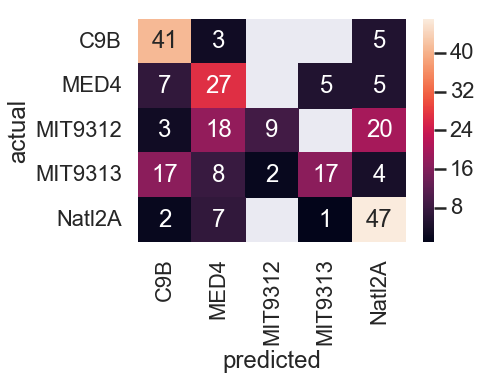

In [97]:
cp.forest_heatmap(clf=clf, X=X, y=y)

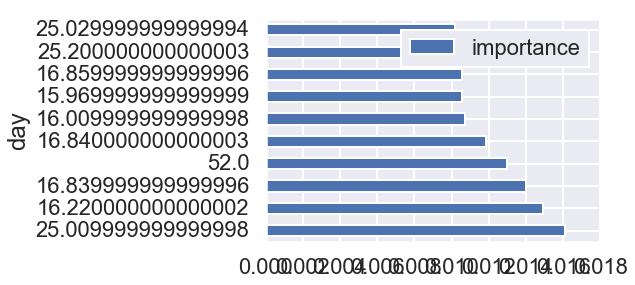

In [98]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)

In [99]:
gdecay = cp.generate_features(df=dfd)

In [100]:
g = gdecay

In [101]:
X = cp.features2X(g)
metadf = cp.get_meta(g, meta_col=['experiment_sample', 'experiment','sample', 'PRO', 'ALT', 'culture'], 
                     value_col='max')
dfpca = cp.run_pca(X=X, metadf=metadf, sample_col='experiment_sample')

Variance percent explained
 [0.37817821 0.17293231]


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


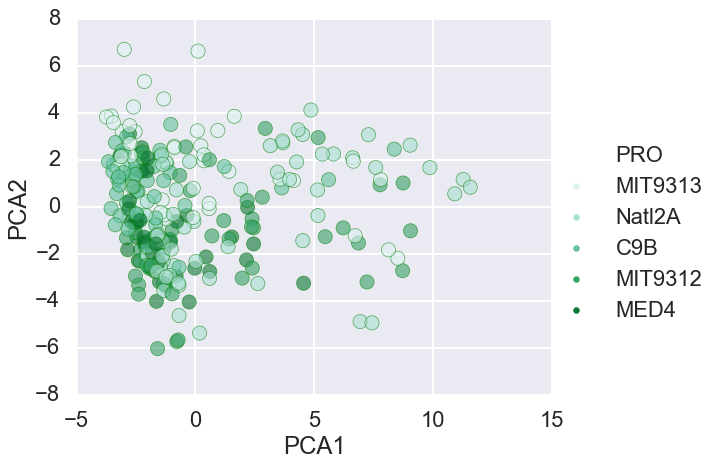

In [102]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

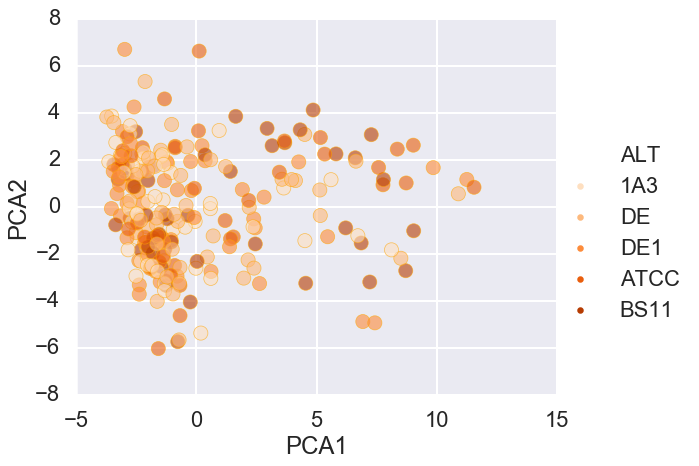

In [103]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2, 
                       palette=apallete, hue_order=aorder, edgecolor=aedge,
)

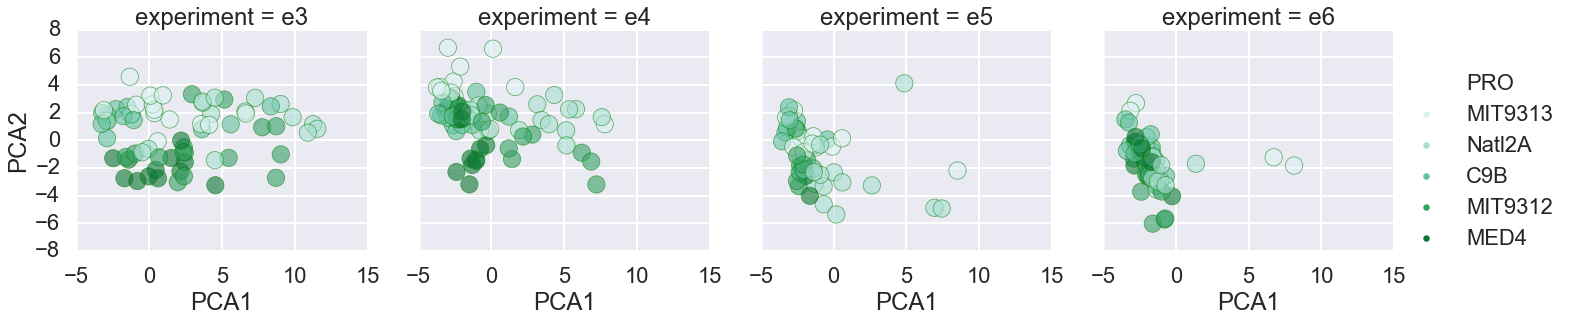

In [104]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', s=300, alpha=0.6,
            col='experiment', height=5,
                       palette=ppallete, hue_order=porder, edgecolor=pedge,
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

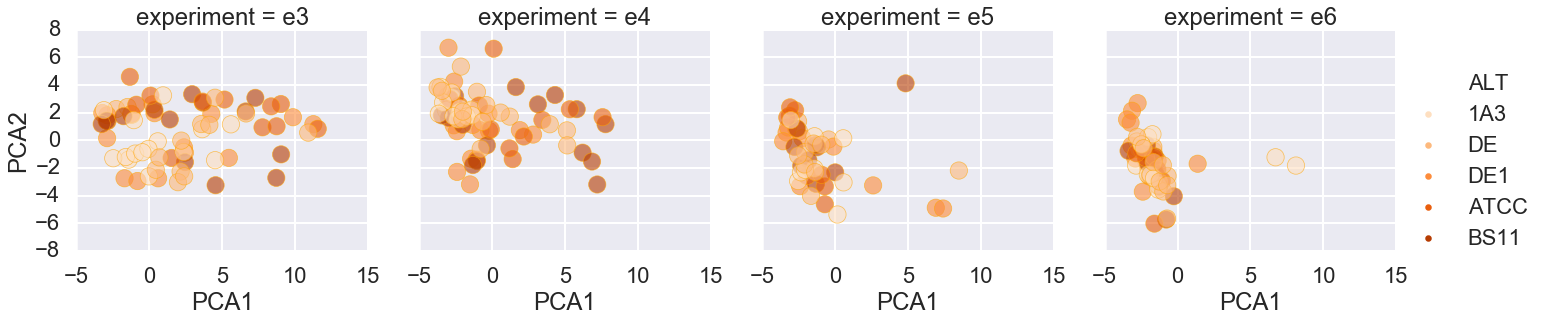

In [105]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT', s=300, alpha=0.6,
            col='experiment', height=5,
                                   palette=apallete, hue_order=aorder, edgecolor=aedge,

           )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [106]:
X = cp.features2X(g)
y = g['PRO']
metadf = cp.get_meta(g, meta_col=['experiment_sample', 'experiment','sample', 'PRO', 'ALT', 'culture'], 
                     value_col='max')
clf = cp.forest_classifier(X=X, y=y)

0.5483870967741935


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


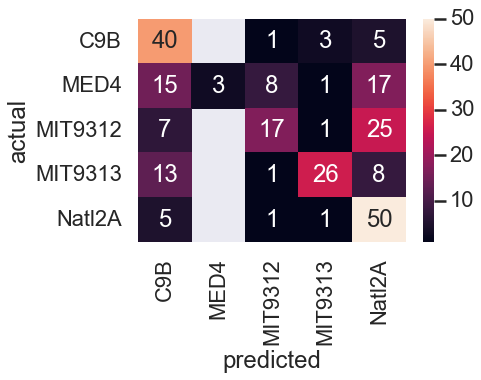

In [107]:
cp.forest_heatmap(clf=clf, X=X, y=y)

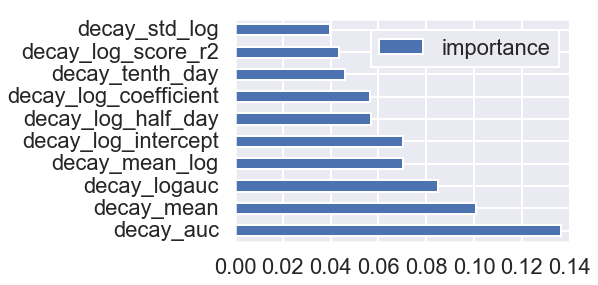

In [108]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)

In [109]:
X = cp.features2X(g)
y = g['ALT']
clf = cp.forest_classifier(X=X, y=y)

0.6088709677419355


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


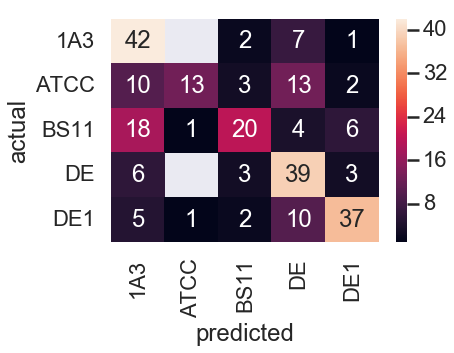

In [110]:
cp.forest_heatmap(clf=clf, X=X, y=y)

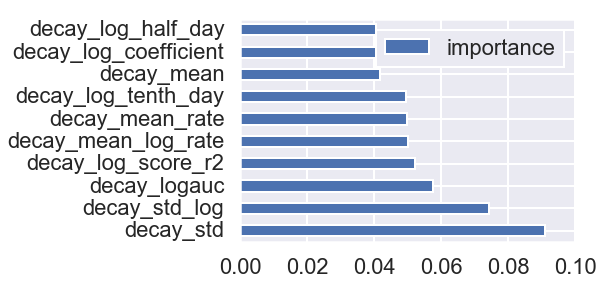

In [111]:
cp.forest_feature_importance(clf=clf, col_names=X.columns)